# StateModelRnD

There are two methods for using StateModelRnD, one is to install the python package on your computer and to write python scripts solve and interact with the solution. The other is to use the web interface. This notebook will focus on how to interact with StateModelRnD in a python script.

Before we begin we need to import a few libraries, including `StateModelRnD`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import StateModelRnD
from StateModelRnD import to_numpy
import sympy
sympy.init_printing()
%matplotlib inline

Now that the required libraries have been imported we can start working on a problem. In this case we will be working on the problem set forth in the [tutorial](https://github.com/CameronDevine/StateModelRnD/blob/tutorial/tutorial.md). This problem consists of a motor powering a pump through a flexible shaft. This pump pushes water through an enbow with a known resistance and out into the atmosphere. A diagram of the physical system can be seen below,

![system](data:image/svg+xml;base64,
PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiPz4KPHN2ZyB4bWxucz0iaHR0cDov
L3d3dy53My5vcmcvMjAwMC9zdmciIHhtbG5zOnhsaW5rPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5
L3hsaW5rIiB3aWR0aD0iMzA4LjQ3OHB0IiBoZWlnaHQ9Ijc3LjA4OHB0IiB2aWV3Qm94PSIwIDAg
MzA4LjQ3OCA3Ny4wODgiIHZlcnNpb249IjEuMSI+CjxkZWZzPgo8Zz4KPHN5bWJvbCBvdmVyZmxv
dz0idmlzaWJsZSIgaWQ9ImdseXBoMC0wIj4KPHBhdGggc3R5bGU9InN0cm9rZTpub25lOyIgZD0i
Ii8+Cjwvc3ltYm9sPgo8c3ltYm9sIG92ZXJmbG93PSJ2aXNpYmxlIiBpZD0iZ2x5cGgwLTEiPgo8
cGF0aCBzdHlsZT0ic3Ryb2tlOm5vbmU7IiBkPSJNIDUuMDc4MTI1IC00LjAzMTI1IEMgNS4wNjI1
IC00LjA2MjUgNS4wMzEyNSAtNC4xNDA2MjUgNS4wMzEyNSAtNC4xNzE4NzUgQyA1LjAzMTI1IC00
LjE3MTg3NSA1LjIwMzEyNSAtNC4zMTI1IDUuMzEyNSAtNC4zOTA2MjUgTCA3LjA2MjUgLTUuNzM0
Mzc1IEMgOCAtNi40Mzc1IDguMzkwNjI1IC02LjQ2ODc1IDguNjg3NSAtNi41IEMgOC43NjU2MjUg
LTYuNTE1NjI1IDguODU5Mzc1IC02LjUxNTYyNSA4Ljg1OTM3NSAtNi43MDMxMjUgQyA4Ljg1OTM3
NSAtNi43MzQzNzUgOC44MjgxMjUgLTYuODEyNSA4Ljc1IC02LjgxMjUgQyA4LjUzMTI1IC02Ljgx
MjUgOC4yODEyNSAtNi43ODEyNSA4LjA0Njg3NSAtNi43ODEyNSBDIDcuNjg3NSAtNi43ODEyNSA3
LjI5Njg3NSAtNi44MTI1IDYuOTM3NSAtNi44MTI1IEMgNi44NzUgLTYuODEyNSA2Ljc1IC02Ljgx
MjUgNi43NSAtNi42MDkzNzUgQyA2Ljc1IC02LjU0Njg3NSA2Ljc5Njg3NSAtNi41MTU2MjUgNi44
NzUgLTYuNSBDIDcuMDkzNzUgLTYuNDg0Mzc1IDcuMTcxODc1IC02LjQzNzUgNy4xNzE4NzUgLTYu
Mjk2ODc1IEMgNy4xNzE4NzUgLTYuMTA5Mzc1IDYuODc1IC01Ljg3NSA2LjgxMjUgLTUuODI4MTI1
IEwgMi45Mzc1IC0yLjg0Mzc1IEwgMy43MzQzNzUgLTYuMDQ2ODc1IEMgMy44MTI1IC02LjQwNjI1
IDMuODQzNzUgLTYuNSA0LjU2MjUgLTYuNSBDIDQuODEyNSAtNi41IDQuOTA2MjUgLTYuNSA0Ljkw
NjI1IC02LjcwMzEyNSBDIDQuOTA2MjUgLTYuNzgxMjUgNC44MjgxMjUgLTYuODEyNSA0Ljc2NTYy
NSAtNi44MTI1IEMgNC40ODQzNzUgLTYuODEyNSAzLjc2NTYyNSAtNi43ODEyNSAzLjQ4NDM3NSAt
Ni43ODEyNSBDIDMuMjAzMTI1IC02Ljc4MTI1IDIuNSAtNi44MTI1IDIuMjAzMTI1IC02LjgxMjUg
QyAyLjE0MDYyNSAtNi44MTI1IDIgLTYuODEyNSAyIC02LjYyNSBDIDIgLTYuNSAyLjA5Mzc1IC02
LjUgMi4yOTY4NzUgLTYuNSBDIDIuNDIxODc1IC02LjUgMi42MDkzNzUgLTYuNDg0Mzc1IDIuNzE4
NzUgLTYuNDg0Mzc1IEMgMi44NzUgLTYuNDUzMTI1IDIuOTM3NSAtNi40Mzc1IDIuOTM3NSAtNi4z
MTI1IEMgMi45Mzc1IC02LjI4MTI1IDIuOTM3NSAtNi4yNSAyLjkwNjI1IC02LjEyNSBMIDEuNTYy
NSAtMC43ODEyNSBDIDEuNDY4NzUgLTAuMzkwNjI1IDEuNDUzMTI1IC0wLjMxMjUgMC42NTYyNSAt
MC4zMTI1IEMgMC40ODQzNzUgLTAuMzEyNSAwLjM3NSAtMC4zMTI1IDAuMzc1IC0wLjEyNSBDIDAu
Mzc1IDAgMC41IDAgMC41MzEyNSAwIEMgMC44MTI1IDAgMS41MTU2MjUgLTAuMDMxMjUgMS43OTY4
NzUgLTAuMDMxMjUgQyAyIC0wLjAzMTI1IDIuMjE4NzUgLTAuMDE1NjI1IDIuNDM3NSAtMC4wMTU2
MjUgQyAyLjY1NjI1IC0wLjAxNTYyNSAyLjg3NSAwIDMuMDc4MTI1IDAgQyAzLjE1NjI1IDAgMy4y
ODEyNSAwIDMuMjgxMjUgLTAuMjAzMTI1IEMgMy4yODEyNSAtMC4zMTI1IDMuMTg3NSAtMC4zMTI1
IDMgLTAuMzEyNSBDIDIuNjI1IC0wLjMxMjUgMi4zNTkzNzUgLTAuMzEyNSAyLjM1OTM3NSAtMC40
ODQzNzUgQyAyLjM1OTM3NSAtMC41NjI1IDIuNDA2MjUgLTAuNzgxMjUgMi40Mzc1IC0wLjkyMTg3
NSBDIDIuNTc4MTI1IC0xLjQ1MzEyNSAyLjcxODc1IC0xLjk2ODc1IDIuODQzNzUgLTIuNSBMIDQu
MzI4MTI1IC0zLjY1NjI1IEwgNS40ODQzNzUgLTAuOTY4NzUgQyA1LjYwOTM3NSAtMC43MDMxMjUg
NS42MDkzNzUgLTAuNjcxODc1IDUuNjA5Mzc1IC0wLjYyNSBDIDUuNjA5Mzc1IC0wLjMxMjUgNS4x
NzE4NzUgLTAuMzEyNSA1LjA3ODEyNSAtMC4zMTI1IEMgNC45Njg3NSAtMC4zMTI1IDQuODU5Mzc1
IC0wLjMxMjUgNC44NTkzNzUgLTAuMTA5Mzc1IEMgNC44NTkzNzUgMCA0Ljk4NDM3NSAwIDUgMCBD
IDUuNDA2MjUgMCA1LjgyODEyNSAtMC4wMzEyNSA2LjIxODc1IC0wLjAzMTI1IEMgNi40Mzc1IC0w
LjAzMTI1IDYuOTg0Mzc1IDAgNy4yMDMxMjUgMCBDIDcuMjUgMCA3LjM3NSAwIDcuMzc1IC0wLjIw
MzEyNSBDIDcuMzc1IC0wLjMxMjUgNy4yNjU2MjUgLTAuMzEyNSA3LjE3MTg3NSAtMC4zMTI1IEMg
Ni43NjU2MjUgLTAuMzEyNSA2LjY0MDYyNSAtMC40MDYyNSA2LjQ4NDM3NSAtMC43NSBaIE0gNS4w
NzgxMjUgLTQuMDMxMjUgIi8+Cjwvc3ltYm9sPgo8c3ltYm9sIG92ZXJmbG93PSJ2aXNpYmxlIiBp
ZD0iZ2x5cGgwLTIiPgo8cGF0aCBzdHlsZT0ic3Ryb2tlOm5vbmU7IiBkPSJNIDYuMjY1NjI1IC01
LjY3MTg3NSBDIDYuNzUgLTYuNDUzMTI1IDcuMTcxODc1IC02LjQ4NDM3NSA3LjUzMTI1IC02LjUg
QyA3LjY1NjI1IC02LjUxNTYyNSA3LjY3MTg3NSAtNi42NzE4NzUgNy42NzE4NzUgLTYuNjg3NSBD
IDcuNjcxODc1IC02Ljc2NTYyNSA3LjYwOTM3NSAtNi44MTI1IDcuNTMxMjUgLTYuODEyNSBDIDcu
MjgxMjUgLTYuODEyNSA2Ljk4NDM3NSAtNi43ODEyNSA2LjcxODc1IC02Ljc4MTI1IEMgNi4zOTA2
MjUgLTYuNzgxMjUgNi4wNDY4NzUgLTYuODEyNSA1LjczNDM3NSAtNi44MTI1IEMgNS42NzE4NzUg
LTYuODEyNSA1LjU0Njg3NSAtNi44MTI1IDUuNTQ2ODc1IC02LjYyNSBDIDUuNTQ2ODc1IC02LjUx
NTYyNSA1LjYyNSAtNi41IDUuNzAzMTI1IC02LjUgQyA1Ljk2ODc1IC02LjQ4NDM3NSA2LjE1NjI1
IC02LjM3NSA2LjE1NjI1IC02LjE3MTg3NSBDIDYuMTU2MjUgLTYuMDE1NjI1IDYuMDE1NjI1IC01
Ljc5Njg3NSA2LjAxNTYyNSAtNS43OTY4NzUgTCAyLjk1MzEyNSAtMC45MjE4NzUgTCAyLjI2NTYy
NSAtNi4yMDMxMjUgQyAyLjI2NTYyNSAtNi4zNzUgMi41IC02LjUgMi45NTMxMjUgLTYuNSBDIDMu
MDkzNzUgLTYuNSAzLjIwMzEyNSAtNi41IDMuMjAzMTI1IC02LjcwMzEyNSBDIDMuMjAzMTI1IC02
Ljc4MTI1IDMuMTI1IC02LjgxMjUgMy4wNzgxMjUgLTYuODEyNSBDIDIuNjcxODc1IC02LjgxMjUg
Mi4yNSAtNi43ODEyNSAxLjgyODEyNSAtNi43ODEyNSBDIDEuNjU2MjUgLTYuNzgxMjUgMS40Njg3
NSAtNi43ODEyNSAxLjI4MTI1IC02Ljc4MTI1IEMgMS4xMDkzNzUgLTYuNzgxMjUgMC45MjE4NzUg
LTYuODEyNSAwLjc1IC02LjgxMjUgQyAwLjY3MTg3NSAtNi44MTI1IDAuNTYyNSAtNi44MTI1IDAu
NTYyNSAtNi42MjUgQyAwLjU2MjUgLTYuNSAwLjY0MDYyNSAtNi41IDAuODEyNSAtNi41IEMgMS4z
NTkzNzUgLTYuNSAxLjM3NSAtNi40MDYyNSAxLjQwNjI1IC02LjE1NjI1IEwgMi4xODc1IC0wLjAx
NTYyNSBDIDIuMjE4NzUgMC4xODc1IDIuMjY1NjI1IDAuMjE4NzUgMi4zOTA2MjUgMC4yMTg3NSBD
IDIuNTQ2ODc1IDAuMjE4NzUgMi41OTM3NSAwLjE3MTg3NSAyLjY3MTg3NSAwLjA0Njg3NSBaIE0g
Ni4yNjU2MjUgLTUuNjcxODc1ICIvPgo8L3N5bWJvbD4KPHN5bWJvbCBvdmVyZmxvdz0idmlzaWJs
ZSIgaWQ9ImdseXBoMC0zIj4KPHBhdGggc3R5bGU9InN0cm9rZTpub25lOyIgZD0iTSAzLjczNDM3
NSAtNi4xMjUgQyAzLjc5Njg3NSAtNi4zNTkzNzUgMy44MjgxMjUgLTYuNDUzMTI1IDQuMDE1NjI1
IC02LjQ4NDM3NSBDIDQuMTA5Mzc1IC02LjUgNC40MjE4NzUgLTYuNSA0LjYyNSAtNi41IEMgNS4z
MjgxMjUgLTYuNSA2LjQzNzUgLTYuNSA2LjQzNzUgLTUuNTE1NjI1IEMgNi40Mzc1IC01LjE3MTg3
NSA2LjI4MTI1IC00LjQ4NDM3NSA1Ljg5MDYyNSAtNC4wOTM3NSBDIDUuNjI1IC0zLjg0Mzc1IDUu
MTA5Mzc1IC0zLjUxNTYyNSA0LjIwMzEyNSAtMy41MTU2MjUgTCAzLjA5Mzc1IC0zLjUxNTYyNSBa
IE0gNS4xNzE4NzUgLTMuMzkwNjI1IEMgNi4xODc1IC0zLjYwOTM3NSA3LjM1OTM3NSAtNC4zMTI1
IDcuMzU5Mzc1IC01LjMxMjUgQyA3LjM1OTM3NSAtNi4xNzE4NzUgNi40Njg3NSAtNi44MTI1IDUu
MTU2MjUgLTYuODEyNSBMIDIuMzI4MTI1IC02LjgxMjUgQyAyLjEyNSAtNi44MTI1IDIuMDMxMjUg
LTYuODEyNSAyLjAzMTI1IC02LjYwOTM3NSBDIDIuMDMxMjUgLTYuNSAyLjEyNSAtNi41IDIuMzEy
NSAtNi41IEMgMi4zMjgxMjUgLTYuNSAyLjUxNTYyNSAtNi41IDIuNjg3NSAtNi40ODQzNzUgQyAy
Ljg3NSAtNi40NTMxMjUgMi45NTMxMjUgLTYuNDUzMTI1IDIuOTUzMTI1IC02LjMxMjUgQyAyLjk1
MzEyNSAtNi4yODEyNSAyLjk1MzEyNSAtNi4yNSAyLjkyMTg3NSAtNi4xMjUgTCAxLjU3ODEyNSAt
MC43ODEyNSBDIDEuNDg0Mzc1IC0wLjM5MDYyNSAxLjQ2ODc1IC0wLjMxMjUgMC42NzE4NzUgLTAu
MzEyNSBDIDAuNSAtMC4zMTI1IDAuNDA2MjUgLTAuMzEyNSAwLjQwNjI1IC0wLjEwOTM3NSBDIDAu
NDA2MjUgMCAwLjUzMTI1IDAgMC41NDY4NzUgMCBDIDAuODI4MTI1IDAgMS41MzEyNSAtMC4wMzEy
NSAxLjc5Njg3NSAtMC4wMzEyNSBDIDIuMDc4MTI1IC0wLjAzMTI1IDIuNzk2ODc1IDAgMy4wNzgx
MjUgMCBDIDMuMTU2MjUgMCAzLjI2NTYyNSAwIDMuMjY1NjI1IC0wLjIwMzEyNSBDIDMuMjY1NjI1
IC0wLjMxMjUgMy4xODc1IC0wLjMxMjUgMi45ODQzNzUgLTAuMzEyNSBDIDIuNjI1IC0wLjMxMjUg
Mi4zNDM3NSAtMC4zMTI1IDIuMzQzNzUgLTAuNDg0Mzc1IEMgMi4zNDM3NSAtMC41NDY4NzUgMi4z
NTkzNzUgLTAuNTkzNzUgMi4zNzUgLTAuNjU2MjUgTCAzLjAzMTI1IC0zLjI5Njg3NSBMIDQuMjE4
NzUgLTMuMjk2ODc1IEMgNS4xMjUgLTMuMjk2ODc1IDUuMjk2ODc1IC0yLjczNDM3NSA1LjI5Njg3
NSAtMi4zOTA2MjUgQyA1LjI5Njg3NSAtMi4yNSA1LjIxODc1IC0xLjkzNzUgNS4xNTYyNSAtMS43
MDMxMjUgQyA1LjA5Mzc1IC0xLjQyMTg3NSA1IC0xLjA2MjUgNSAtMC44NTkzNzUgQyA1IDAuMjE4
NzUgNi4yMDMxMjUgMC4yMTg3NSA2LjMyODEyNSAwLjIxODc1IEMgNy4xNzE4NzUgMC4yMTg3NSA3
LjUzMTI1IC0wLjc4MTI1IDcuNTMxMjUgLTAuOTIxODc1IEMgNy41MzEyNSAtMS4wNDY4NzUgNy40
MjE4NzUgLTEuMDQ2ODc1IDcuNDA2MjUgLTEuMDQ2ODc1IEMgNy4zMTI1IC0xLjA0Njg3NSA3LjI5
Njg3NSAtMC45ODQzNzUgNy4yODEyNSAtMC45MDYyNSBDIDcuMDMxMjUgLTAuMTcxODc1IDYuNTkz
NzUgMCA2LjM3NSAwIEMgNi4wNDY4NzUgMCA1Ljk2ODc1IC0wLjIxODc1IDUuOTY4NzUgLTAuNjA5
Mzc1IEMgNS45Njg3NSAtMC45MjE4NzUgNi4wMzEyNSAtMS40MjE4NzUgNi4wNzgxMjUgLTEuNzUg
QyA2LjA5Mzc1IC0xLjg5MDYyNSA2LjEwOTM3NSAtMi4wNzgxMjUgNi4xMDkzNzUgLTIuMjE4NzUg
QyA2LjEwOTM3NSAtMi45ODQzNzUgNS40Mzc1IC0zLjI5Njg3NSA1LjE3MTg3NSAtMy4zOTA2MjUg
WiBNIDUuMTcxODc1IC0zLjM5MDYyNSAiLz4KPC9zeW1ib2w+CjxzeW1ib2wgb3ZlcmZsb3c9InZp
c2libGUiIGlkPSJnbHlwaDAtNCI+CjxwYXRoIHN0eWxlPSJzdHJva2U6bm9uZTsiIGQ9Ik0gMy43
MzQzNzUgLTYuMDMxMjUgQyAzLjgxMjUgLTYuMzkwNjI1IDMuODQzNzUgLTYuNSA0Ljc4MTI1IC02
LjUgQyA1LjA3ODEyNSAtNi41IDUuMTU2MjUgLTYuNSA1LjE1NjI1IC02LjY4NzUgQyA1LjE1NjI1
IC02LjgxMjUgNS4wNDY4NzUgLTYuODEyNSA1IC02LjgxMjUgQyA0LjY3MTg3NSAtNi44MTI1IDMu
ODU5Mzc1IC02Ljc4MTI1IDMuNTMxMjUgLTYuNzgxMjUgQyAzLjIzNDM3NSAtNi43ODEyNSAyLjUg
LTYuODEyNSAyLjIwMzEyNSAtNi44MTI1IEMgMi4xNDA2MjUgLTYuODEyNSAyLjAxNTYyNSAtNi44
MTI1IDIuMDE1NjI1IC02LjYwOTM3NSBDIDIuMDE1NjI1IC02LjUgMi4xMDkzNzUgLTYuNSAyLjI5
Njg3NSAtNi41IEMgMi4zMTI1IC02LjUgMi41IC02LjUgMi42NzE4NzUgLTYuNDg0Mzc1IEMgMi44
NDM3NSAtNi40NTMxMjUgMi45Mzc1IC02LjQ1MzEyNSAyLjkzNzUgLTYuMzEyNSBDIDIuOTM3NSAt
Ni4yODEyNSAyLjkzNzUgLTYuMjUgMi45MDYyNSAtNi4xMjUgTCAxLjU2MjUgLTAuNzgxMjUgQyAx
LjQ2ODc1IC0wLjM5MDYyNSAxLjQ1MzEyNSAtMC4zMTI1IDAuNjU2MjUgLTAuMzEyNSBDIDAuNDg0
Mzc1IC0wLjMxMjUgMC4zOTA2MjUgLTAuMzEyNSAwLjM5MDYyNSAtMC4xMDkzNzUgQyAwLjM5MDYy
NSAwIDAuNDg0Mzc1IDAgMC42NTYyNSAwIEwgNS4yODEyNSAwIEMgNS41MTU2MjUgMCA1LjUxNTYy
NSAwIDUuNTc4MTI1IC0wLjE3MTg3NSBMIDYuMzc1IC0yLjMyODEyNSBDIDYuNDA2MjUgLTIuNDM3
NSA2LjQwNjI1IC0yLjQ1MzEyNSA2LjQwNjI1IC0yLjQ2ODc1IEMgNi40MDYyNSAtMi41IDYuMzc1
IC0yLjU3ODEyNSA2LjI5Njg3NSAtMi41NzgxMjUgQyA2LjIwMzEyNSAtMi41NzgxMjUgNi4xODc1
IC0yLjUxNTYyNSA2LjEyNSAtMi4zNTkzNzUgQyA1Ljc4MTI1IC0xLjQ1MzEyNSA1LjM0Mzc1IC0w
LjMxMjUgMy42MjUgLTAuMzEyNSBMIDIuNjg3NSAtMC4zMTI1IEMgMi41NDY4NzUgLTAuMzEyNSAy
LjUxNTYyNSAtMC4zMTI1IDIuNDY4NzUgLTAuMzEyNSBDIDIuMzU5Mzc1IC0wLjMyODEyNSAyLjMy
ODEyNSAtMC4zNDM3NSAyLjMyODEyNSAtMC40MjE4NzUgQyAyLjMyODEyNSAtMC40NTMxMjUgMi4z
MjgxMjUgLTAuNDY4NzUgMi4zNzUgLTAuNjQwNjI1IFogTSAzLjczNDM3NSAtNi4wMzEyNSAiLz4K
PC9zeW1ib2w+CjxzeW1ib2wgb3ZlcmZsb3c9InZpc2libGUiIGlkPSJnbHlwaDAtNSI+CjxwYXRo
IHN0eWxlPSJzdHJva2U6bm9uZTsiIGQ9Ik0gNC4zNTkzNzUgLTAuMDYyNSBDIDUuOTA2MjUgLTAu
NjQwNjI1IDcuMzc1IC0yLjQyMTg3NSA3LjM3NSAtNC4zNDM3NSBDIDcuMzc1IC01Ljk1MzEyNSA2
LjMxMjUgLTcuMDMxMjUgNC44MjgxMjUgLTcuMDMxMjUgQyAyLjY4NzUgLTcuMDMxMjUgMC40ODQz
NzUgLTQuNzY1NjI1IDAuNDg0Mzc1IC0yLjQzNzUgQyAwLjQ4NDM3NSAtMC43ODEyNSAxLjYwOTM3
NSAwLjIxODc1IDMuMDQ2ODc1IDAuMjE4NzUgQyAzLjI5Njg3NSAwLjIxODc1IDMuNjI1IDAuMTcx
ODc1IDQuMDE1NjI1IDAuMDYyNSBDIDMuOTg0Mzc1IDAuNjg3NSAzLjk4NDM3NSAwLjcwMzEyNSAz
Ljk4NDM3NSAwLjg0Mzc1IEMgMy45ODQzNzUgMS4xNTYyNSAzLjk4NDM3NSAxLjkzNzUgNC44MTI1
IDEuOTM3NSBDIDUuOTg0Mzc1IDEuOTM3NSA2LjQ2ODc1IDAuMTA5Mzc1IDYuNDY4NzUgMCBDIDYu
NDY4NzUgLTAuMDYyNSA2LjQwNjI1IC0wLjA5Mzc1IDYuMzU5Mzc1IC0wLjA5Mzc1IEMgNi4yODEy
NSAtMC4wOTM3NSA2LjI2NTYyNSAtMC4wNDY4NzUgNi4yMzQzNzUgMC4wMTU2MjUgQyA2IDAuNzE4
NzUgNS40MjE4NzUgMC45Njg3NSA1LjA3ODEyNSAwLjk2ODc1IEMgNC42MDkzNzUgMC45Njg3NSA0
LjQ2ODc1IDAuNzAzMTI1IDQuMzU5Mzc1IC0wLjA2MjUgWiBNIDIuNDg0Mzc1IC0wLjE0MDYyNSBD
IDEuNzAzMTI1IC0wLjQ1MzEyNSAxLjM1OTM3NSAtMS4yMTg3NSAxLjM1OTM3NSAtMi4xMjUgQyAx
LjM1OTM3NSAtMi44MTI1IDEuNjI1IC00LjIzNDM3NSAyLjM3NSAtNS4yOTY4NzUgQyAzLjEwOTM3
NSAtNi4zMTI1IDQuMDQ2ODc1IC02Ljc4MTI1IDQuNzgxMjUgLTYuNzgxMjUgQyA1Ljc2NTYyNSAt
Ni43ODEyNSA2LjUgLTYgNi41IC00LjY3MTg3NSBDIDYuNSAtMy42NzE4NzUgNS45ODQzNzUgLTEu
MzI4MTI1IDQuMzEyNSAtMC40MDYyNSBDIDQuMjY1NjI1IC0wLjc1IDQuMTcxODc1IC0xLjQ2ODc1
IDMuNDM3NSAtMS40Njg3NSBDIDIuOTA2MjUgLTEuNDY4NzUgMi40MjE4NzUgLTAuOTg0Mzc1IDIu
NDIxODc1IC0wLjQ1MzEyNSBDIDIuNDIxODc1IC0wLjI2NTYyNSAyLjQ4NDM3NSAtMC4xNTYyNSAy
LjQ4NDM3NSAtMC4xNDA2MjUgWiBNIDMuMDkzNzUgLTAuMDMxMjUgQyAyLjk1MzEyNSAtMC4wMzEy
NSAyLjY0MDYyNSAtMC4wMzEyNSAyLjY0MDYyNSAtMC40NTMxMjUgQyAyLjY0MDYyNSAtMC44NTkz
NzUgMy4wMTU2MjUgLTEuMjUgMy40Mzc1IC0xLjI1IEMgMy44NTkzNzUgLTEuMjUgNC4wNDY4NzUg
LTEuMDE1NjI1IDQuMDQ2ODc1IC0wLjQwNjI1IEMgNC4wNDY4NzUgLTAuMjY1NjI1IDQuMDMxMjUg
LTAuMjUgMy45Mzc1IC0wLjIwMzEyNSBDIDMuNjcxODc1IC0wLjA5Mzc1IDMuMzc1IC0wLjAzMTI1
IDMuMDkzNzUgLTAuMDMxMjUgWiBNIDMuMDkzNzUgLTAuMDMxMjUgIi8+Cjwvc3ltYm9sPgo8c3lt
Ym9sIG92ZXJmbG93PSJ2aXNpYmxlIiBpZD0iZ2x5cGgwLTYiPgo8cGF0aCBzdHlsZT0ic3Ryb2tl
Om5vbmU7IiBkPSJNIDIuODU5Mzc1IC02LjgxMjUgQyAyLjg1OTM3NSAtNi44MTI1IDIuODU5Mzc1
IC02LjkyMTg3NSAyLjczNDM3NSAtNi45MjE4NzUgQyAyLjUgLTYuOTIxODc1IDEuNzgxMjUgLTYu
ODQzNzUgMS41MTU2MjUgLTYuODEyNSBDIDEuNDM3NSAtNi44MTI1IDEuMzI4MTI1IC02Ljc5Njg3
NSAxLjMyODEyNSAtNi42MjUgQyAxLjMyODEyNSAtNi41IDEuNDIxODc1IC02LjUgMS41NjI1IC02
LjUgQyAyLjA0Njg3NSAtNi41IDIuMDYyNSAtNi40Mzc1IDIuMDYyNSAtNi4zMjgxMjUgTCAyLjAz
MTI1IC02LjEyNSBMIDAuNTkzNzUgLTAuMzkwNjI1IEMgMC41NDY4NzUgLTAuMjUgMC41NDY4NzUg
LTAuMjM0Mzc1IDAuNTQ2ODc1IC0wLjE3MTg3NSBDIDAuNTQ2ODc1IDAuMDYyNSAwLjc1IDAuMTA5
Mzc1IDAuODQzNzUgMC4xMDkzNzUgQyAwLjk2ODc1IDAuMTA5Mzc1IDEuMTA5Mzc1IDAuMDE1NjI1
IDEuMTcxODc1IC0wLjA5Mzc1IEMgMS4yMTg3NSAtMC4xODc1IDEuNjcxODc1IC0yLjAzMTI1IDEu
NzM0Mzc1IC0yLjI4MTI1IEMgMi4wNzgxMjUgLTIuMjUgMi44OTA2MjUgLTIuMDkzNzUgMi44OTA2
MjUgLTEuNDM3NSBDIDIuODkwNjI1IC0xLjM1OTM3NSAyLjg5MDYyNSAtMS4zMjgxMjUgMi44NTkz
NzUgLTEuMjE4NzUgQyAyLjg0Mzc1IC0xLjEwOTM3NSAyLjgyODEyNSAtMC45ODQzNzUgMi44Mjgx
MjUgLTAuODc1IEMgMi44MjgxMjUgLTAuMjk2ODc1IDMuMjE4NzUgMC4xMDkzNzUgMy43MzQzNzUg
MC4xMDkzNzUgQyA0LjAzMTI1IDAuMTA5Mzc1IDQuMzEyNSAtMC4wNDY4NzUgNC41MzEyNSAtMC40
MjE4NzUgQyA0Ljc4MTI1IC0wLjg1OTM3NSA0Ljg5MDYyNSAtMS40MDYyNSA0Ljg5MDYyNSAtMS40
MjE4NzUgQyA0Ljg5MDYyNSAtMS41MzEyNSA0Ljc5Njg3NSAtMS41MzEyNSA0Ljc2NTYyNSAtMS41
MzEyNSBDIDQuNjcxODc1IC0xLjUzMTI1IDQuNjU2MjUgLTEuNDg0Mzc1IDQuNjI1IC0xLjM0Mzc1
IEMgNC40MjE4NzUgLTAuNjI1IDQuMjAzMTI1IC0wLjEwOTM3NSAzLjc2NTYyNSAtMC4xMDkzNzUg
QyAzLjU2MjUgLTAuMTA5Mzc1IDMuNDM3NSAtMC4yMTg3NSAzLjQzNzUgLTAuNTc4MTI1IEMgMy40
Mzc1IC0wLjc1IDMuNDg0Mzc1IC0wLjk4NDM3NSAzLjUxNTYyNSAtMS4xNDA2MjUgQyAzLjU2MjUg
LTEuMzEyNSAzLjU2MjUgLTEuMzQzNzUgMy41NjI1IC0xLjQ1MzEyNSBDIDMuNTYyNSAtMi4wOTM3
NSAyLjkzNzUgLTIuMzc1IDIuMDc4MTI1IC0yLjUgQyAyLjM5MDYyNSAtMi42NzE4NzUgMi43MTg3
NSAtMi45ODQzNzUgMi45Mzc1IC0zLjIzNDM3NSBDIDMuNDIxODc1IC0zLjc2NTYyNSAzLjg3NSAt
NC4xODc1IDQuMzU5Mzc1IC00LjE4NzUgQyA0LjQyMTg3NSAtNC4xODc1IDQuNDM3NSAtNC4xODc1
IDQuNDUzMTI1IC00LjE3MTg3NSBDIDQuNTc4MTI1IC00LjE1NjI1IDQuNTc4MTI1IC00LjE1NjI1
IDQuNjcxODc1IC00LjA5Mzc1IEMgNC42ODc1IC00LjA5Mzc1IDQuNjg3NSAtNC4wNzgxMjUgNC43
MDMxMjUgLTQuMDYyNSBDIDQuMjM0Mzc1IC00LjAzMTI1IDQuMTQwNjI1IC0zLjY0MDYyNSA0LjE0
MDYyNSAtMy41MTU2MjUgQyA0LjE0MDYyNSAtMy4zNTkzNzUgNC4yNSAtMy4xNzE4NzUgNC41MTU2
MjUgLTMuMTcxODc1IEMgNC43ODEyNSAtMy4xNzE4NzUgNS4wNjI1IC0zLjM5MDYyNSA1LjA2MjUg
LTMuNzgxMjUgQyA1LjA2MjUgLTQuMDc4MTI1IDQuODI4MTI1IC00LjQwNjI1IDQuMzkwNjI1IC00
LjQwNjI1IEMgNC4xMDkzNzUgLTQuNDA2MjUgMy42NTYyNSAtNC4zMjgxMjUgMi45Mzc1IC0zLjUz
MTI1IEMgMi41OTM3NSAtMy4xNTYyNSAyLjIwMzEyNSAtMi43NSAxLjgyODEyNSAtMi42MDkzNzUg
WiBNIDIuODU5Mzc1IC02LjgxMjUgIi8+Cjwvc3ltYm9sPgo8c3ltYm9sIG92ZXJmbG93PSJ2aXNp
YmxlIiBpZD0iZ2x5cGgwLTciPgo8cGF0aCBzdHlsZT0ic3Ryb2tlOm5vbmU7IiBkPSJNIDEuNTc4
MTI1IC0wLjc4MTI1IEMgMS40ODQzNzUgLTAuMzkwNjI1IDEuNDY4NzUgLTAuMzEyNSAwLjY3MTg3
NSAtMC4zMTI1IEMgMC41MTU2MjUgLTAuMzEyNSAwLjQwNjI1IC0wLjMxMjUgMC40MDYyNSAtMC4x
MjUgQyAwLjQwNjI1IDAgMC40ODQzNzUgMCAwLjY3MTg3NSAwIEwgMy45ODQzNzUgMCBDIDYuMDQ2
ODc1IDAgOC4wMTU2MjUgLTIuMTA5Mzc1IDguMDE1NjI1IC00LjI4MTI1IEMgOC4wMTU2MjUgLTUu
Njg3NSA3LjE3MTg3NSAtNi44MTI1IDUuNjcxODc1IC02LjgxMjUgTCAyLjMyODEyNSAtNi44MTI1
IEMgMi4xNDA2MjUgLTYuODEyNSAyLjAzMTI1IC02LjgxMjUgMi4wMzEyNSAtNi42MjUgQyAyLjAz
MTI1IC02LjUgMi4xMDkzNzUgLTYuNSAyLjMxMjUgLTYuNSBDIDIuNDM3NSAtNi41IDIuNjI1IC02
LjQ4NDM3NSAyLjczNDM3NSAtNi40ODQzNzUgQyAyLjkwNjI1IC02LjQ1MzEyNSAyLjk1MzEyNSAt
Ni40Mzc1IDIuOTUzMTI1IC02LjMxMjUgQyAyLjk1MzEyNSAtNi4yODEyNSAyLjk1MzEyNSAtNi4y
NSAyLjkyMTg3NSAtNi4xMjUgWiBNIDMuNzM0Mzc1IC02LjEyNSBDIDMuODI4MTI1IC02LjQ2ODc1
IDMuODQzNzUgLTYuNSA0LjI4MTI1IC02LjUgTCA1LjM0Mzc1IC02LjUgQyA2LjMxMjUgLTYuNSA3
LjE0MDYyNSAtNS45Njg3NSA3LjE0MDYyNSAtNC42NTYyNSBDIDcuMTQwNjI1IC00LjE3MTg3NSA2
Ljk1MzEyNSAtMi41MzEyNSA2LjA5Mzc1IC0xLjQzNzUgQyA1LjgxMjUgLTEuMDYyNSA1LjAzMTI1
IC0wLjMxMjUgMy43OTY4NzUgLTAuMzEyNSBMIDIuNjcxODc1IC0wLjMxMjUgQyAyLjUzMTI1IC0w
LjMxMjUgMi41MTU2MjUgLTAuMzEyNSAyLjQ1MzEyNSAtMC4zMTI1IEMgMi4zNTkzNzUgLTAuMzI4
MTI1IDIuMzI4MTI1IC0wLjM0Mzc1IDIuMzI4MTI1IC0wLjQyMTg3NSBDIDIuMzI4MTI1IC0wLjQ1
MzEyNSAyLjMyODEyNSAtMC40Njg3NSAyLjM3NSAtMC42NDA2MjUgWiBNIDMuNzM0Mzc1IC02LjEy
NSAiLz4KPC9zeW1ib2w+CjxzeW1ib2wgb3ZlcmZsb3c9InZpc2libGUiIGlkPSJnbHlwaDEtMCI+
CjxwYXRoIHN0eWxlPSJzdHJva2U6bm9uZTsiIGQ9IiIvPgo8L3N5bWJvbD4KPHN5bWJvbCBvdmVy
Zmxvdz0idmlzaWJsZSIgaWQ9ImdseXBoMS0xIj4KPHBhdGggc3R5bGU9InN0cm9rZTpub25lOyIg
ZD0iTSAzLjcxODc1IC0yLjUzMTI1IEMgMy43MTg3NSAtMy4wNzgxMjUgMy4zOTA2MjUgLTMuMDc4
MTI1IDMuMzc1IC0zLjA3ODEyNSBDIDMuMTg3NSAtMy4wNzgxMjUgMyAtMi44OTA2MjUgMyAtMi43
MDMxMjUgQyAzIC0yLjU5Mzc1IDMuMDYyNSAtMi41MzEyNSAzLjEwOTM3NSAtMi41IEMgMy4yMzQz
NzUgLTIuMzkwNjI1IDMuMzc1IC0yLjIxODc1IDMuMzc1IC0xLjkzNzUgQyAzLjM3NSAtMS42MjUg
Mi45MDYyNSAtMC4xMjUgMi4wNzgxMjUgLTAuMTI1IEMgMS41MTU2MjUgLTAuMTI1IDEuNTE1NjI1
IC0wLjYyNSAxLjUxNTYyNSAtMC43NSBDIDEuNTE1NjI1IC0xLjA2MjUgMS42NDA2MjUgLTEuNDUz
MTI1IDEuOTA2MjUgLTIuMTA5Mzc1IEMgMS45NTMxMjUgLTIuMjUgMiAtMi4zNTkzNzUgMiAtMi40
Njg3NSBDIDIgLTIuODQzNzUgMS42ODc1IC0zLjA3ODEyNSAxLjM0Mzc1IC0zLjA3ODEyNSBDIDAu
NjQwNjI1IC0zLjA3ODEyNSAwLjMyODEyNSAtMi4xMjUgMC4zMjgxMjUgLTIgQyAwLjMyODEyNSAt
MS45MjE4NzUgMC40MjE4NzUgLTEuOTIxODc1IDAuNDUzMTI1IC0xLjkyMTg3NSBDIDAuNTQ2ODc1
IC0xLjkyMTg3NSAwLjU0Njg3NSAtMS45NTMxMjUgMC41NzgxMjUgLTIuMDMxMjUgQyAwLjczNDM3
NSAtMi41OTM3NSAxLjAzMTI1IC0yLjg3NSAxLjMxMjUgLTIuODc1IEMgMS40Mzc1IC0yLjg3NSAx
LjQ4NDM3NSAtMi43OTY4NzUgMS40ODQzNzUgLTIuNjQwNjI1IEMgMS40ODQzNzUgLTIuNDY4NzUg
MS40Mzc1IC0yLjMyODEyNSAxLjM1OTM3NSAtMi4xNzE4NzUgQyAxLjA2MjUgLTEuMzkwNjI1IDAu
OTg0Mzc1IC0xLjA5Mzc1IDAuOTg0Mzc1IC0wLjg0Mzc1IEMgMC45ODQzNzUgLTAuMTU2MjUgMS41
MzEyNSAwLjA2MjUgMi4wNjI1IDAuMDYyNSBDIDMuMjM0Mzc1IDAuMDYyNSAzLjcxODc1IC0xLjk1
MzEyNSAzLjcxODc1IC0yLjUzMTI1IFogTSAzLjcxODc1IC0yLjUzMTI1ICIvPgo8L3N5bWJvbD4K
PHN5bWJvbCBvdmVyZmxvdz0idmlzaWJsZSIgaWQ9ImdseXBoMS0yIj4KPHBhdGggc3R5bGU9InN0
cm9rZTpub25lOyIgZD0iTSAzIC0yLjYyNSBDIDIuODI4MTI1IC0yLjU3ODEyNSAyLjcwMzEyNSAt
Mi40Mzc1IDIuNzAzMTI1IC0yLjI5Njg3NSBDIDIuNzAzMTI1IC0yLjEyNSAyLjg0Mzc1IC0yLjA2
MjUgMi45Mzc1IC0yLjA2MjUgQyAzLjAxNTYyNSAtMi4wNjI1IDMuMjgxMjUgLTIuMTA5Mzc1IDMu
MjgxMjUgLTIuNDY4NzUgQyAzLjI4MTI1IC0yLjkyMTg3NSAyLjc4MTI1IC0zLjA3ODEyNSAyLjM0
Mzc1IC0zLjA3ODEyNSBDIDEuMjY1NjI1IC0zLjA3ODEyNSAxLjA2MjUgLTIuMjY1NjI1IDEuMDYy
NSAtMi4wNjI1IEMgMS4wNjI1IC0xLjc5Njg3NSAxLjIxODc1IC0xLjYyNSAxLjMxMjUgLTEuNTQ2
ODc1IEMgMS40ODQzNzUgLTEuNDA2MjUgMS42MDkzNzUgLTEuMzc1IDIuMDkzNzUgLTEuMjk2ODc1
IEMgMi4yNSAtMS4yNjU2MjUgMi42ODc1IC0xLjE4NzUgMi42ODc1IC0wLjg0Mzc1IEMgMi42ODc1
IC0wLjcxODc1IDIuNjA5Mzc1IC0wLjQ1MzEyNSAyLjMyODEyNSAtMC4yODEyNSBDIDIuMDQ2ODc1
IC0wLjEyNSAxLjcwMzEyNSAtMC4xMjUgMS42MjUgLTAuMTI1IEMgMS4zNDM3NSAtMC4xMjUgMC45
NTMxMjUgLTAuMTg3NSAwLjc4MTI1IC0wLjQyMTg3NSBDIDEuMDE1NjI1IC0wLjQ1MzEyNSAxLjE3
MTg3NSAtMC42MjUgMS4xNzE4NzUgLTAuODEyNSBDIDEuMTcxODc1IC0wLjk4NDM3NSAxLjA0Njg3
NSAtMS4wNzgxMjUgMC45MDYyNSAtMS4wNzgxMjUgQyAwLjcwMzEyNSAtMS4wNzgxMjUgMC41IC0w
LjkwNjI1IDAuNSAtMC42MDkzNzUgQyAwLjUgLTAuMTg3NSAwLjkzNzUgMC4wNjI1IDEuNjA5Mzc1
IDAuMDYyNSBDIDIuOTA2MjUgMC4wNjI1IDMuMTQwNjI1IC0wLjgxMjUgMy4xNDA2MjUgLTEuMDc4
MTI1IEMgMy4xNDA2MjUgLTEuNzE4NzUgMi40Mzc1IC0xLjg0Mzc1IDIuMTcxODc1IC0xLjg5MDYy
NSBDIDIuMTA5Mzc1IC0xLjkwNjI1IDEuOTM3NSAtMS45Mzc1IDEuODkwNjI1IC0xLjk1MzEyNSBD
IDEuNjQwNjI1IC0yIDEuNTE1NjI1IC0yLjE0MDYyNSAxLjUxNTYyNSAtMi4yOTY4NzUgQyAxLjUx
NTYyNSAtMi40NTMxMjUgMS42NDA2MjUgLTIuNjQwNjI1IDEuNzk2ODc1IC0yLjc1IEMgMS45ODQz
NzUgLTIuODU5Mzc1IDIuMjE4NzUgLTIuODc1IDIuMzQzNzUgLTIuODc1IEMgMi40ODQzNzUgLTIu
ODc1IDIuODQzNzUgLTIuODU5Mzc1IDMgLTIuNjI1IFogTSAzIC0yLjYyNSAiLz4KPC9zeW1ib2w+
CjxzeW1ib2wgb3ZlcmZsb3c9InZpc2libGUiIGlkPSJnbHlwaDEtMyI+CjxwYXRoIHN0eWxlPSJz
dHJva2U6bm9uZTsiIGQ9Ik0gMi44NzUgLTQuMjY1NjI1IEMgMi45MjE4NzUgLTQuNDY4NzUgMi45
Mzc1IC00LjQ4NDM3NSAzLjA5Mzc1IC00LjUxNTYyNSBMIDMuNTQ2ODc1IC00LjUxNTYyNSBDIDQu
MTg3NSAtNC41MTU2MjUgNC45ODQzNzUgLTQuNTE1NjI1IDQuOTg0Mzc1IC0zLjc5Njg3NSBDIDQu
OTg0Mzc1IC0zLjUgNC44NTkzNzUgLTMuMDYyNSA0LjUzMTI1IC0yLjgxMjUgQyA0LjI1IC0yLjU5
Mzc1IDMuODEyNSAtMi40ODQzNzUgMy4zMjgxMjUgLTIuNDg0Mzc1IEwgMi40Mzc1IC0yLjQ4NDM3
NSBaIE0gNC4xNDA2MjUgLTIuMzc1IEMgNC45Njg3NSAtMi41NjI1IDUuNzAzMTI1IC0zLjA2MjUg
NS43MDMxMjUgLTMuNjg3NSBDIDUuNzAzMTI1IC00LjI4MTI1IDUgLTQuNzY1NjI1IDMuOTg0Mzc1
IC00Ljc2NTYyNSBMIDEuODQzNzUgLTQuNzY1NjI1IEMgMS43MTg3NSAtNC43NjU2MjUgMS42MjUg
LTQuNzY1NjI1IDEuNjI1IC00LjYwOTM3NSBDIDEuNjI1IC00LjUxNTYyNSAxLjcwMzEyNSAtNC41
MTU2MjUgMS44NDM3NSAtNC41MTU2MjUgQyAxLjg1OTM3NSAtNC41MTU2MjUgMS45ODQzNzUgLTQu
NTE1NjI1IDIuMTA5Mzc1IC00LjUgQyAyLjI2NTYyNSAtNC40ODQzNzUgMi4yNjU2MjUgLTQuNDY4
NzUgMi4yNjU2MjUgLTQuMzkwNjI1IEMgMi4yNjU2MjUgLTQuMzkwNjI1IDIuMjY1NjI1IC00LjM0
Mzc1IDIuMjUgLTQuMjUgTCAxLjMxMjUgLTAuNTQ2ODc1IEMgMS4yNjU2MjUgLTAuMzEyNSAxLjI1
IC0wLjI1IDAuNzAzMTI1IC0wLjI1IEMgMC41NzgxMjUgLTAuMjUgMC41IC0wLjI1IDAuNSAtMC4x
MDkzNzUgQyAwLjUgLTAuMDMxMjUgMC41NDY4NzUgMCAwLjYwOTM3NSAwIEMgMC43MzQzNzUgMCAw
LjkwNjI1IC0wLjAxNTYyNSAxLjAzMTI1IC0wLjAxNTYyNSBDIDEuMTcxODc1IC0wLjAxNTYyNSAx
LjM3NSAtMC4wMzEyNSAxLjUgLTAuMDMxMjUgQyAxLjY0MDYyNSAtMC4wMzEyNSAxLjc5Njg3NSAt
MC4wMTU2MjUgMS45Mzc1IC0wLjAxNTYyNSBDIDIuMDkzNzUgLTAuMDE1NjI1IDIuMjY1NjI1IDAg
Mi40MDYyNSAwIEMgMi40NTMxMjUgMCAyLjU2MjUgMCAyLjU2MjUgLTAuMTQwNjI1IEMgMi41NjI1
IC0wLjI1IDIuNDg0Mzc1IC0wLjI1IDIuMzI4MTI1IC0wLjI1IEMgMi4yMTg3NSAtMC4yNSAyLjE4
NzUgLTAuMjUgMi4wNjI1IC0wLjI2NTYyNSBDIDEuOTA2MjUgLTAuMjgxMjUgMS45MDYyNSAtMC4y
OTY4NzUgMS45MDYyNSAtMC4zNzUgQyAxLjkwNjI1IC0wLjM3NSAxLjkwNjI1IC0wLjQyMTg3NSAx
LjkzNzUgLTAuNTE1NjI1IEwgMi4zNzUgLTIuMjgxMjUgTCAzLjMyODEyNSAtMi4yODEyNSBDIDMu
OTIxODc1IC0yLjI4MTI1IDQuMTg3NSAtMS45ODQzNzUgNC4xODc1IC0xLjY1NjI1IEMgNC4xODc1
IC0xLjU2MjUgNC4xMjUgLTEuMzI4MTI1IDQuMDc4MTI1IC0xLjE3MTg3NSBDIDQgLTAuODQzNzUg
My45Njg3NSAtMC43NSAzLjk2ODc1IC0wLjYyNSBDIDMuOTY4NzUgLTAuMDc4MTI1IDQuNDg0Mzc1
IDAuMTQwNjI1IDUgMC4xNDA2MjUgQyA1LjY0MDYyNSAwLjE0MDYyNSA1LjkyMTg3NSAtMC41NDY4
NzUgNS45MjE4NzUgLTAuNjcxODc1IEMgNS45MjE4NzUgLTAuNjg3NSA1LjkwNjI1IC0wLjc2NTYy
NSA1Ljc5Njg3NSAtMC43NjU2MjUgQyA1LjcwMzEyNSAtMC43NjU2MjUgNS42ODc1IC0wLjcxODc1
IDUuNjcxODc1IC0wLjY0MDYyNSBDIDUuNTc4MTI1IC0wLjM0Mzc1IDUuMzEyNSAtMC4wNjI1IDUu
MDMxMjUgLTAuMDYyNSBDIDQuODQzNzUgLTAuMDYyNSA0LjcwMzEyNSAtMC4xMjUgNC43MDMxMjUg
LTAuNTE1NjI1IEMgNC43MDMxMjUgLTAuNjg3NSA0Ljc1IC0xLjA0Njg3NSA0Ljc4MTI1IC0xLjIz
NDM3NSBDIDQuODEyNSAtMS40MjE4NzUgNC44MTI1IC0xLjQ4NDM3NSA0LjgxMjUgLTEuNTYyNSBD
IDQuODEyNSAtMS42NDA2MjUgNC44MTI1IC0xLjg3NSA0LjYwOTM3NSAtMi4wNzgxMjUgQyA0LjQ4
NDM3NSAtMi4yMTg3NSA0LjI5Njg3NSAtMi4zMTI1IDQuMTQwNjI1IC0yLjM3NSBaIE0gNC4xNDA2
MjUgLTIuMzc1ICIvPgo8L3N5bWJvbD4KPHN5bWJvbCBvdmVyZmxvdz0idmlzaWJsZSIgaWQ9Imds
eXBoMS00Ij4KPHBhdGggc3R5bGU9InN0cm9rZTpub25lOyIgZD0iTSAxLjcxODc1IC0yLjc1IEwg
Mi40MjE4NzUgLTIuNzUgQyAyLjU2MjUgLTIuNzUgMi42NDA2MjUgLTIuNzUgMi42NDA2MjUgLTIu
OTA2MjUgQyAyLjY0MDYyNSAtMyAyLjU2MjUgLTMgMi40Mzc1IC0zIEwgMS43ODEyNSAtMyBMIDIu
MDMxMjUgLTQuMDMxMjUgQyAyLjA0Njg3NSAtNC4wNjI1IDIuMDYyNSAtNC4xMDkzNzUgMi4wNjI1
IC00LjEyNSBDIDIuMDYyNSAtNC4yNjU2MjUgMS45NTMxMjUgLTQuMzU5Mzc1IDEuODEyNSAtNC4z
NTkzNzUgQyAxLjY0MDYyNSAtNC4zNTkzNzUgMS41NDY4NzUgLTQuMjM0Mzc1IDEuNDg0Mzc1IC00
LjA2MjUgQyAxLjQzNzUgLTMuODc1IDEuNTMxMjUgLTQuMjE4NzUgMS4yMTg3NSAtMyBMIDAuNTE1
NjI1IC0zIEMgMC4zOTA2MjUgLTMgMC4yOTY4NzUgLTMgMC4yOTY4NzUgLTIuODQzNzUgQyAwLjI5
Njg3NSAtMi43NSAwLjM3NSAtMi43NSAwLjUgLTIuNzUgTCAxLjE1NjI1IC0yLjc1IEwgMC43NSAt
MS4xMDkzNzUgQyAwLjcwMzEyNSAtMC45Mzc1IDAuNjQwNjI1IC0wLjY4NzUgMC42NDA2MjUgLTAu
NTkzNzUgQyAwLjY0MDYyNSAtMC4xODc1IDEgMC4wNjI1IDEuMzkwNjI1IDAuMDYyNSBDIDIuMTcx
ODc1IDAuMDYyNSAyLjYwOTM3NSAtMC45MDYyNSAyLjYwOTM3NSAtMSBDIDIuNjA5Mzc1IC0xLjA5
Mzc1IDIuNTE1NjI1IC0xLjA5Mzc1IDIuNSAtMS4wOTM3NSBDIDIuNDA2MjUgLTEuMDkzNzUgMi40
MDYyNSAtMS4wNzgxMjUgMi4zNDM3NSAtMC45NTMxMjUgQyAyLjE1NjI1IC0wLjUxNTYyNSAxLjc5
Njg3NSAtMC4xMjUgMS40MjE4NzUgLTAuMTI1IEMgMS4yNjU2MjUgLTAuMTI1IDEuMTcxODc1IC0w
LjIxODc1IDEuMTcxODc1IC0wLjQ2ODc1IEMgMS4xNzE4NzUgLTAuNTMxMjUgMS4yMDMxMjUgLTAu
Njg3NSAxLjIxODc1IC0wLjc1IFogTSAxLjcxODc1IC0yLjc1ICIvPgo8L3N5bWJvbD4KPHN5bWJv
bCBvdmVyZmxvdz0idmlzaWJsZSIgaWQ9ImdseXBoMi0wIj4KPHBhdGggc3R5bGU9InN0cm9rZTpu
b25lOyIgZD0iIi8+Cjwvc3ltYm9sPgo8c3ltYm9sIG92ZXJmbG93PSJ2aXNpYmxlIiBpZD0iZ2x5
cGgyLTEiPgo8cGF0aCBzdHlsZT0ic3Ryb2tlOm5vbmU7IiBkPSJNIC00LjA3ODEyNSAyLjI5Njg3
NSBMIC02Ljg1OTM3NSAyLjI5Njg3NSBDIC03IDIuMjk2ODc1IC03LjE4NzUgMi4yOTY4NzUgLTcu
MTg3NSAyLjUgQyAtNy4xODc1IDIuNjg3NSAtNyAyLjY4NzUgLTYuODU5Mzc1IDIuNjg3NSBMIC00
LjA3ODEyNSAyLjY4NzUgTCAtNC4wNzgxMjUgNS40ODQzNzUgQyAtNC4wNzgxMjUgNS42MjUgLTQu
MDc4MTI1IDUuODEyNSAtMy44NzUgNS44MTI1IEMgLTMuNjcxODc1IDUuODEyNSAtMy42NzE4NzUg
NS42MjUgLTMuNjcxODc1IDUuNDg0Mzc1IEwgLTMuNjcxODc1IDIuNjg3NSBMIC0wLjg5MDYyNSAy
LjY4NzUgQyAtMC43NSAyLjY4NzUgLTAuNTYyNSAyLjY4NzUgLTAuNTYyNSAyLjUgQyAtMC41NjI1
IDIuMjk2ODc1IC0wLjc1IDIuMjk2ODc1IC0wLjg5MDYyNSAyLjI5Njg3NSBMIC0zLjY3MTg3NSAy
LjI5Njg3NSBMIC0zLjY3MTg3NSAtMC41IEMgLTMuNjcxODc1IC0wLjY0MDYyNSAtMy42NzE4NzUg
LTAuODI4MTI1IC0zLjg3NSAtMC44MjgxMjUgQyAtNC4wNzgxMjUgLTAuODI4MTI1IC00LjA3ODEy
NSAtMC42NDA2MjUgLTQuMDc4MTI1IC0wLjUgWiBNIC00LjA3ODEyNSAyLjI5Njg3NSAiLz4KPC9z
eW1ib2w+CjxzeW1ib2wgb3ZlcmZsb3c9InZpc2libGUiIGlkPSJnbHlwaDMtMCI+CjxwYXRoIHN0
eWxlPSJzdHJva2U6bm9uZTsiIGQ9IiIvPgo8L3N5bWJvbD4KPHN5bWJvbCBvdmVyZmxvdz0idmlz
aWJsZSIgaWQ9ImdseXBoMy0xIj4KPHBhdGggc3R5bGU9InN0cm9rZTpub25lOyIgZD0iTSAtNi41
NjI1IDIuMjk2ODc1IEMgLTYuNzM0Mzc1IDIuMjk2ODc1IC02LjkyMTg3NSAyLjI5Njg3NSAtNi45
MjE4NzUgMi41IEMgLTYuOTIxODc1IDIuNjg3NSAtNi43MzQzNzUgMi42ODc1IC02LjU2MjUgMi42
ODc1IEwgLTEuMTcxODc1IDIuNjg3NSBDIC0xIDIuNjg3NSAtMC44MjgxMjUgMi42ODc1IC0wLjgy
ODEyNSAyLjUgQyAtMC44MjgxMjUgMi4yOTY4NzUgLTEgMi4yOTY4NzUgLTEuMTcxODc1IDIuMjk2
ODc1IFogTSAtNi41NjI1IDIuMjk2ODc1ICIvPgo8L3N5bWJvbD4KPC9nPgo8Y2xpcFBhdGggaWQ9
ImNsaXAxIj4KICA8cGF0aCBkPSJNIDE2IDE5IEwgMTQ2IDE5IEwgMTQ2IDc3LjA4OTg0NCBMIDE2
IDc3LjA4OTg0NCBaIE0gMTYgMTkgIi8+CjwvY2xpcFBhdGg+CjxjbGlwUGF0aCBpZD0iY2xpcDIi
PgogIDxwYXRoIGQ9Ik0gMjQ1LjQzMzU5NCAzNi40ODA0NjkgTCAyNjIuNDQxNDA2IDM2LjQ4MDQ2
OSBMIDI2Mi40NDE0MDYgNTkuMTU2MjUgTCAyNDUuNDMzNTk0IDU5LjE1NjI1IFogTSAyNDUuNDMz
NTk0IDM2LjQ4MDQ2OSAiLz4KPC9jbGlwUGF0aD4KPGNsaXBQYXRoIGlkPSJjbGlwMyI+CiAgPHBh
dGggZD0iTSAyOTMgMTggTCAzMDguNDc2NTYyIDE4IEwgMzA4LjQ3NjU2MiAzNSBMIDI5MyAzNSBa
IE0gMjkzIDE4ICIvPgo8L2NsaXBQYXRoPgo8L2RlZnM+CjxnIGlkPSJzdXJmYWNlMSI+CjxwYXRo
IHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMzk4NTtzdHJva2UtbGluZWNhcDpidXR0
O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAlLDAlLDAlKTtzdHJva2Utb3BhY2l0
eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSAxNS41OTAzMTMgMTQuMTc0NDY5IEwgLTE1
LjU4OTM3NSAxNC4xNzQ0NjkgQyAtMTguNzIyMTg3IDE0LjE3NDQ2OSAtMjEuMjYxMjUgMTEuNjM1
NDA2IC0yMS4yNjEyNSA4LjUwMjU5NCBMIC0yMS4yNjEyNSAtOC41MDUyMTkgQyAtMjEuMjYxMjUg
LTExLjYzNDEyNSAtMTguNzIyMTg3IC0xNC4xNzMxODggLTE1LjU4OTM3NSAtMTQuMTczMTg4IEwg
MTUuNTkwMzEzIC0xNC4xNzMxODggQyAxOC43MjMxMjUgLTE0LjE3MzE4OCAyMS4yNTgyODEgLTEx
LjYzNDEyNSAyMS4yNTgyODEgLTguNTA1MjE5IEwgMjEuMjU4MjgxIDguNTAyNTk0IEMgMjEuMjU4
MjgxIDExLjYzNTQwNiAxOC43MjMxMjUgMTQuMTc0NDY5IDE1LjU5MDMxMyAxNC4xNzQ0NjkgWiBN
IDE1LjU5MDMxMyAxNC4xNzQ0NjkgIiB0cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwxNzEuNzMs
NDcuODE5KSIvPgo8ZyBzdHlsZT0iZmlsbDpyZ2IoMCUsMCUsMCUpO2ZpbGwtb3BhY2l0eToxOyI+
CiAgPHVzZSB4bGluazpocmVmPSIjZ2x5cGgwLTEiIHg9IjE2NS4xMzMiIHk9IjUwLjQ3NSIvPgo8
L2c+CjxnIHN0eWxlPSJmaWxsOnJnYigwJSwwJSwwJSk7ZmlsbC1vcGFjaXR5OjE7Ij4KICA8dXNl
IHhsaW5rOmhyZWY9IiNnbHlwaDEtMSIgeD0iMTczLjU5NCIgeT0iNTEuOTciLz4KPC9nPgo8cGF0
aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjM5ODU7c3Ryb2tlLWxpbmVjYXA6YnV0
dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlOnJnYigwJSwwJSwwJSk7c3Ryb2tlLW9wYWNp
dHk6MTtzdHJva2UtbWl0ZXJsaW1pdDoxMDsiIGQ9Ik0gMTUuOTY1MzEzIDE0LjM3MzY4NyBMIDE1
Ljk2NTMxMyAtMTQuMzcyNDA2ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3
LjgxOSkiLz4KPHBhdGggc3R5bGU9ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9r
ZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUp
O3N0cm9rZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIC0xNS45NjQzNzUg
MTQuMzczNjg3IEwgLTE1Ljk2NDM3NSAtMTQuMzcyNDA2ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSww
LDAsLTEsMTcxLjczLDQ3LjgxOSkiLz4KPHBhdGggc3R5bGU9ImZpbGw6bm9uZTtzdHJva2Utd2lk
dGg6MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9r
ZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGltaXQ6MTA7IiBk
PSJNIDIxLjI1ODI4MSAtMi4xMjYzMTMgTCAzNS40MzQwNjMgLTIuMTI2MzEzIEwgMzUuNDM0MDYz
IDIuMTI3NTk0IEwgMjEuMjU4MjgxIDIuMTI3NTk0IFogTSAyMS4yNTgyODEgLTIuMTI2MzEzICIg
dHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3LjgxOSkiLz4KPHBhdGggc3R5bGU9
ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tl
LWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ry
b2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIC0yMS40NjA0NjkgLTE3LjAwOTEyNSBMIDIxLjA1OTA2
MyAtMTcuMDA5MTI1ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3LjgxOSki
Lz4KPHBhdGggc3R5bGU9ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1saW5l
Y2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9r
ZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIC02LjcwMjY1NiAtMTQuMzcy
NDA2IEwgLTYuNzAyNjU2IC0xNy4yMDgzNDQgIiB0cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwx
NzEuNzMsNDcuODE5KSIvPgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjM5
ODU7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlOnJnYigw
JSwwJSwwJSk7c3Ryb2tlLW9wYWNpdHk6MTtzdHJva2UtbWl0ZXJsaW1pdDoxMDsiIGQ9Ik0gLTEy
LjA2MjAzMSAtMTQuMzcyNDA2IEwgLTEyLjA2MjAzMSAtMTcuMjA4MzQ0ICIgdHJhbnNmb3JtPSJt
YXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3LjgxOSkiLz4KPHBhdGggc3R5bGU9ImZpbGw6bm9uZTtz
dHJva2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1p
dGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGlt
aXQ6MTA7IiBkPSJNIDYuNzAzNTk0IC0xNC4zNzI0MDYgTCA2LjcwMzU5NCAtMTcuMjA4MzQ0ICIg
dHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3LjgxOSkiLz4KPHBhdGggc3R5bGU9
ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tl
LWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ry
b2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIDEyLjA1OTA2MyAtMTQuMzcyNDA2IEwgMTIuMDU5MDYz
IC0xNy4yMDgzNDQgIiB0cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwxNzEuNzMsNDcuODE5KSIv
Pgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjM5ODU7c3Ryb2tlLWxpbmVj
YXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlOnJnYigwJSwwJSwwJSk7c3Ryb2tl
LW9wYWNpdHk6MTtzdHJva2UtbWl0ZXJsaW1pdDoxMDsiIGQ9Ik0gLTIxLjQ2MDQ2OSA3LjgxMTE4
NyBMIC0yNS43MTA0NjkgNy44MTExODcgIiB0cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwxNzEu
NzMsNDcuODE5KSIvPgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjM5ODU7
c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlOnJnYigwJSww
JSwwJSk7c3Ryb2tlLW9wYWNpdHk6MTtzdHJva2UtbWl0ZXJsaW1pdDoxMDsiIGQ9Ik0gLTI1Ljcx
MDQ2OSA3LjgxMTE4NyBDIC0yNS43MTA0NjkgOC4yMDE4MTIgLTI2LjAyNjg3NSA4LjUxODIxOSAt
MjYuNDIxNDA2IDguNTE4MjE5IEMgLTI2LjgxMjAzMSA4LjUxODIxOSAtMjcuMTI4NDM3IDguMjAx
ODEyIC0yNy4xMjg0MzcgNy44MTExODcgQyAtMjcuMTI4NDM3IDcuNDIwNTYyIC0yNi44MTIwMzEg
Ny4xMDAyNSAtMjYuNDIxNDA2IDcuMTAwMjUgQyAtMjYuMDI2ODc1IDcuMTAwMjUgLTI1LjcxMDQ2
OSA3LjQyMDU2MiAtMjUuNzEwNDY5IDcuODExMTg3IFogTSAtMjUuNzEwNDY5IDcuODExMTg3ICIg
dHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3LjgxOSkiLz4KPHBhdGggc3R5bGU9
ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tl
LWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ry
b2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIC0yMS40NjA0NjkgLTcuODA5OTA2IEwgLTI1LjcxMDQ2
OSAtNy44MDk5MDYgIiB0cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwxNzEuNzMsNDcuODE5KSIv
Pgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjM5ODU7c3Ryb2tlLWxpbmVj
YXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlOnJnYigwJSwwJSwwJSk7c3Ryb2tl
LW9wYWNpdHk6MTtzdHJva2UtbWl0ZXJsaW1pdDoxMDsiIGQ9Ik0gLTI1LjcxMDQ2OSAtNy44MDk5
MDYgQyAtMjUuNzEwNDY5IC03LjQxOTI4MSAtMjYuMDI2ODc1IC03LjEwMjg3NSAtMjYuNDIxNDA2
IC03LjEwMjg3NSBDIC0yNi44MTIwMzEgLTcuMTAyODc1IC0yNy4xMjg0MzcgLTcuNDE5MjgxIC0y
Ny4xMjg0MzcgLTcuODA5OTA2IEMgLTI3LjEyODQzNyAtOC4yMDA1MzEgLTI2LjgxMjAzMSAtOC41
MjA4NDQgLTI2LjQyMTQwNiAtOC41MjA4NDQgQyAtMjYuMDI2ODc1IC04LjUyMDg0NCAtMjUuNzEw
NDY5IC04LjIwMDUzMSAtMjUuNzEwNDY5IC03LjgwOTkwNiBaIE0gLTI1LjcxMDQ2OSAtNy44MDk5
MDYgIiB0cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwxNzEuNzMsNDcuODE5KSIvPgo8ZyBjbGlw
LXBhdGg9InVybCgjY2xpcDEpIiBjbGlwLXJ1bGU9Im5vbnplcm8iPgo8cGF0aCBzdHlsZT0iZmls
bDpub25lO3N0cm9rZS13aWR0aDowLjM5ODU7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGlu
ZWpvaW46bWl0ZXI7c3Ryb2tlOnJnYigwJSwwJSwwJSk7c3Ryb2tlLW9wYWNpdHk6MTtzdHJva2Ut
bWl0ZXJsaW1pdDoxMDsiIGQ9Ik0gLTI2LjQyMTQwNiAtOC43MjAwNjMgTCAtMjYuNDIxNDA2IC0y
OS4wNzE2MjUgTCAtMTM5LjgwODEyNSAtMjkuMDcxNjI1IE0gLTEzOS44MDgxMjUgLTI5LjA3MTYy
NSBMIC0xMzkuODA4MTI1IC0xMi42MzAyMTkgTSAtMTM5LjgwODEyNSAxMS4xODIyODEgTCAtMTM5
LjgwODEyNSAyNy42MjM2ODcgTSAtMTU1LjUyMjk2OSAtOS43OTgxODggTCAtMTU1LjUyMjk2OSA4
LjM1MDI1IE0gLTEzOS44MDgxMjUgMjcuNjIzNjg3IEwgLTEyNy4zMzU0NjkgMjcuNjIzNjg3IE0g
LTk1LjU4NTQ2OSAyNy42MjM2ODcgTCAtODMuMTEyODEyIDI3LjYyMzY4NyBNIC04My4xMTI4MTIg
MjcuNjIzNjg3IEwgLTY2LjY3MTQwNiAyNy42MjM2ODcgTSAtNDIuODYyODEyIDI3LjYyMzY4NyBM
IC0yNi40MjE0MDYgMjcuNjIzNjg3IE0gLTI2LjQyMTQwNiAyNy42MjM2ODcgTCAtMjYuNDIxNDA2
IDguNzE3NDM3ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3LjgxOSkiLz4K
PC9nPgo8ZyBzdHlsZT0iZmlsbDpyZ2IoMCUsMCUsMCUpO2ZpbGwtb3BhY2l0eToxOyI+CiAgPHVz
ZSB4bGluazpocmVmPSIjZ2x5cGgyLTEiIHg9IjM1Ljc5OSIgeT0iNDEuMDQiLz4KPC9nPgo8ZyBz
dHlsZT0iZmlsbDpyZ2IoMCUsMCUsMCUpO2ZpbGwtb3BhY2l0eToxOyI+CiAgPHVzZSB4bGluazpo
cmVmPSIjZ2x5cGgzLTEiIHg9IjM1Ljc5OSIgeT0iNTEuMDY2Ii8+CjwvZz4KPHBhdGggc3R5bGU9
ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC43OTc7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2Ut
bGluZWpvaW46bWl0ZXI7c3Ryb2tlOnJnYigwJSwwJSwwJSk7c3Ryb2tlLW9wYWNpdHk6MTtzdHJv
a2UtbWl0ZXJsaW1pdDoxMDsiIGQ9Ik0gLTE1MS43MTQzNzUgLTAuNzIzOTY5IEMgLTE1MS43MTQz
NzUgLTcuMjk4MTg4IC0xNDYuMzgyMzQ0IC0xMi42MzAyMTkgLTEzOS44MDgxMjUgLTEyLjYzMDIx
OSBDIC0xMzMuMjMgLTEyLjYzMDIxOSAtMTI3LjkwMTg3NSAtNy4yOTgxODggLTEyNy45MDE4NzUg
LTAuNzIzOTY5IEMgLTEyNy45MDE4NzUgNS44NTAyNSAtMTMzLjIzIDExLjE4MjI4MSAtMTM5Ljgw
ODEyNSAxMS4xODIyODEgQyAtMTQ2LjM4MjM0NCAxMS4xODIyODEgLTE1MS43MTQzNzUgNS44NTAy
NSAtMTUxLjcxNDM3NSAtMC43MjM5NjkgWiBNIC0xNTEuNzE0Mzc1IC0wLjcyMzk2OSAiIHRyYW5z
Zm9ybT0ibWF0cml4KDEsMCwwLC0xLDE3MS43Myw0Ny44MTkpIi8+CjxwYXRoIHN0eWxlPSJmaWxs
LXJ1bGU6bm9uemVybztmaWxsOnJnYigwJSwwJSwwJSk7ZmlsbC1vcGFjaXR5OjE7c3Ryb2tlLXdp
ZHRoOjAuMzk4NTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJv
a2U6cmdiKDAlLDAlLDAlKTtzdHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIg
ZD0iTSAtMTU1LjUyMjk2OSA2LjYxMTk2OSBMIC0xNTMuNTM4NTk0IDYuNjExOTY5IEwgLTE1NS41
MjI5NjkgMTAuODMwNzE5IEwgLTE1Ny41MDczNDQgNi42MTE5NjkgTCAtMTU1LjUyMjk2OSA2LjYx
MTk2OSAiIHRyYW5zZm9ybT0ibWF0cml4KDEsMCwwLC0xLDE3MS43Myw0Ny44MTkpIi8+CjxnIHN0
eWxlPSJmaWxsOnJnYigwJSwwJSwwJSk7ZmlsbC1vcGFjaXR5OjE7Ij4KICA8dXNlIHhsaW5rOmhy
ZWY9IiNnbHlwaDAtMiIgeD0iMy4zMjEiIHk9IjUxLjE5OSIvPgo8L2c+CjxnIHN0eWxlPSJmaWxs
OnJnYigwJSwwJSwwJSk7ZmlsbC1vcGFjaXR5OjE7Ij4KICA8dXNlIHhsaW5rOmhyZWY9IiNnbHlw
aDEtMiIgeD0iOS4xMzIiIHk9IjUyLjY5MyIvPgo8L2c+CjxwYXRoIHN0eWxlPSJmaWxsOm5vbmU7
c3Ryb2tlLXdpZHRoOjAuNzk3O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1p
dGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGlt
aXQ6MTA7IiBkPSJNIC0xMjcuMzM1NDY5IDI3LjYyMzY4NyBMIC0xMjQuNjg3MDMxIDMzLjU3Njgx
MiBMIC0xMTkuMzk3OTY5IDIxLjY3MDU2MiBMIC0xMTQuMTA1IDMzLjU3NjgxMiBMIC0xMDguODE1
OTM3IDIxLjY3MDU2MiBMIC0xMDMuNTIyOTY5IDMzLjU3NjgxMiBMIC05OC4yMzM5MDYgMjEuNjcw
NTYyIEwgLTk1LjU4NTQ2OSAyNy42MjM2ODcgIiB0cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwx
NzEuNzMsNDcuODE5KSIvPgo8ZyBzdHlsZT0iZmlsbDpyZ2IoMCUsMCUsMCUpO2ZpbGwtb3BhY2l0
eToxOyI+CiAgPHVzZSB4bGluazpocmVmPSIjZ2x5cGgwLTMiIHg9IjU2LjQ1IiB5PSIxMC4xMjgi
Lz4KPC9nPgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjc5NztzdHJva2Ut
bGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAlLDAlLDAlKTtz
dHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSAtNjYuNDcyMTg3IDI3
LjQyNDQ2OSBDIC02Ni40NzIxODcgMzAuNzA5NjI1IC02NS4zNjI4MTIgMzMuMzc3NTk0IC02My45
OTE3MTkgMzMuMzc3NTk0IEMgLTYyLjYyNDUzMSAzMy4zNzc1OTQgLTYxLjUxMTI1IDMwLjcwOTYy
NSAtNjEuNTExMjUgMjcuNDI0NDY5IEMgLTYxLjUxMTI1IDI2LjMyNjgxMiAtNjEuNzg4NTk0IDI1
LjQ0MDA5NCAtNjIuMTMyMzQ0IDI1LjQ0MDA5NCBDIC02Mi40NzYwOTQgMjUuNDQwMDk0IC02Mi43
NTM0MzcgMjYuMzI2ODEyIC02Mi43NTM0MzcgMjcuNDI0NDY5IEMgLTYyLjc1MzQzNyAzMC43MDk2
MjUgLTYxLjY0NDA2MiAzMy4zNzc1OTQgLTYwLjI3Mjk2OSAzMy4zNzc1OTQgQyAtNTguOTAxODc1
IDMzLjM3NzU5NCAtNTcuNzkyNSAzMC43MDk2MjUgLTU3Ljc5MjUgMjcuNDI0NDY5IEMgLTU3Ljc5
MjUgMjYuMzI2ODEyIC01OC4wNjk4NDQgMjUuNDQwMDk0IC01OC40MTM1OTQgMjUuNDQwMDk0IEMg
LTU4Ljc1MzQzNyAyNS40NDAwOTQgLTU5LjAzMDc4MSAyNi4zMjY4MTIgLTU5LjAzMDc4MSAyNy40
MjQ0NjkgQyAtNTkuMDMwNzgxIDMwLjcwOTYyNSAtNTcuOTIxNDA2IDMzLjM3NzU5NCAtNTYuNTUw
MzEyIDMzLjM3NzU5NCBDIC01NS4xODMxMjUgMzMuMzc3NTk0IC01NC4wNjk4NDQgMzAuNzA5NjI1
IC01NC4wNjk4NDQgMjcuNDI0NDY5IEMgLTU0LjA2OTg0NCAyNi4zMjY4MTIgLTU0LjM1MTA5NCAy
NS40NDAwOTQgLTU0LjY5MDkzNyAyNS40NDAwOTQgQyAtNTUuMDM0Njg3IDI1LjQ0MDA5NCAtNTUu
MzEyMDMxIDI2LjMyNjgxMiAtNTUuMzEyMDMxIDI3LjQyNDQ2OSBDIC01NS4zMTIwMzEgMzAuNzA5
NjI1IC01NC4yMDI2NTYgMzMuMzc3NTk0IC01Mi44MzE1NjIgMzMuMzc3NTk0IEMgLTUxLjQ2MDQ2
OSAzMy4zNzc1OTQgLTUwLjM1MTA5NCAzMC43MDk2MjUgLTUwLjM1MTA5NCAyNy40MjQ0NjkgQyAt
NTAuMzUxMDk0IDI2LjMyNjgxMiAtNTAuNjI4NDM3IDI1LjQ0MDA5NCAtNTAuOTcyMTg3IDI1LjQ0
MDA5NCBDIC01MS4zMTIwMzEgMjUuNDQwMDk0IC01MS41ODkzNzUgMjYuMzI2ODEyIC01MS41ODkz
NzUgMjcuNDI0NDY5IEMgLTUxLjU4OTM3NSAzMC43MDk2MjUgLTUwLjQ4IDMzLjM3NzU5NCAtNDku
MTA4OTA2IDMzLjM3NzU5NCBDIC00Ny43NDE3MTkgMzMuMzc3NTk0IC00Ni42MzIzNDQgMzAuNzA5
NjI1IC00Ni42MzIzNDQgMjcuNDI0NDY5IEMgLTQ2LjYzMjM0NCAyNi4zMjY4MTIgLTQ2LjkwOTY4
NyAyNS40NDAwOTQgLTQ3LjI0OTUzMSAyNS40NDAwOTQgQyAtNDcuNTkzMjgxIDI1LjQ0MDA5NCAt
NDcuODcwNjI1IDI2LjMyNjgxMiAtNDcuODcwNjI1IDI3LjQyNDQ2OSBDIC00Ny44NzA2MjUgMzAu
NzA5NjI1IC00Ni43NjEyNSAzMy4zNzc1OTQgLTQ1LjM5MDE1NiAzMy4zNzc1OTQgQyAtNDQuMDE5
MDYyIDMzLjM3NzU5NCAtNDIuOTA5Njg3IDMwLjcwOTYyNSAtNDIuOTA5Njg3IDI3LjQyNDQ2OSAi
IHRyYW5zZm9ybT0ibWF0cml4KDEsMCwwLC0xLDE3MS43Myw0Ny44MTkpIi8+CjxnIHN0eWxlPSJm
aWxsOnJnYigwJSwwJSwwJSk7ZmlsbC1vcGFjaXR5OjE7Ij4KICA8dXNlIHhsaW5rOmhyZWY9IiNn
bHlwaDAtNCIgeD0iMTEzLjU3NCIgeT0iMTAuMTI4Ii8+CjwvZz4KPGcgY2xpcC1wYXRoPSJ1cmwo
I2NsaXAyKSIgY2xpcC1ydWxlPSJub256ZXJvIj4KPHBhdGggc3R5bGU9ImZpbGw6bm9uZTtzdHJv
a2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVy
O3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGltaXQ6
MTA7IiBkPSJNIDkzLjU0MzQzOCAtMC4wMDEzMTI1IEMgOTMuNTQzNDM4IDQuNjk3OTA2IDg5Ljcz
ODc1IDguNTAyNTk0IDg1LjAzOTUzMSA4LjUwMjU5NCBDIDgwLjM0NDIxOSA4LjUwMjU5NCA3Ni41
MzU2MjUgNC42OTc5MDYgNzYuNTM1NjI1IC0wLjAwMTMxMjUgQyA3Ni41MzU2MjUgLTQuNjk2NjI1
IDgwLjM0NDIxOSAtOC41MDUyMTkgODUuMDM5NTMxIC04LjUwNTIxOSBDIDg5LjczODc1IC04LjUw
NTIxOSA5My41NDM0MzggLTQuNjk2NjI1IDkzLjU0MzQzOCAtMC4wMDEzMTI1IFogTSA5My41NDM0
MzggLTAuMDAxMzEyNSAiIHRyYW5zZm9ybT0ibWF0cml4KDEsMCwwLC0xLDE3MS43Myw0Ny44MTkp
Ii8+CjwvZz4KPHBhdGggc3R5bGU9ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9r
ZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUp
O3N0cm9rZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIDkzLjU0MzQzOCAt
MTQuMTczMTg4IEwgOTMuNTQzNDM4IDE3LjAwNjUgQyA5My41NDM0MzggMTguNTcyOTA2IDk0Ljgx
Mjk2OSAxOS44NDI0MzcgOTYuMzc5Mzc1IDE5Ljg0MjQzNyBMIDEwNC44ODMyODEgMTkuODQyNDM3
ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3LjgxOSkiLz4KPHBhdGggc3R5
bGU9ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ry
b2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7
c3Ryb2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIDkwLjczMDkzOCA2LjMxOSBMIDkwLjczMDkzOCAx
Ny4wMDY1IEMgOTAuNzMwOTM4IDIwLjEzOTMxMiA5My4yNyAyMi42NzgzNzUgOTYuMzk4OTA2IDIy
LjY3ODM3NSBMIDEwNC44ODMyODEgMjIuNjc4Mzc1ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAs
LTEsMTcxLjczLDQ3LjgxOSkiLz4KPHBhdGggc3R5bGU9ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6
MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZTpy
Z2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGltaXQ6MTA7IiBkPSJN
IDkwLjczMDkzOCAtNi4zMTc3MTkgTCA5MC43MTE0MDYgLTE0LjE3MzE4OCAiIHRyYW5zZm9ybT0i
bWF0cml4KDEsMCwwLC0xLDE3MS43Myw0Ny44MTkpIi8+CjxwYXRoIHN0eWxlPSIgc3Ryb2tlOm5v
bmU7ZmlsbC1ydWxlOm5vbnplcm87ZmlsbDpyZ2IoMCUsMCUsMCUpO2ZpbGwtb3BhY2l0eToxOyIg
ZD0iTSAyNTguMTg3NSA0Ny44MjAzMTIgQyAyNTguMTg3NSA0Ny4wMzUxNTYgMjU3LjU1NDY4OCA0
Ni40MDIzNDQgMjU2Ljc2OTUzMSA0Ni40MDIzNDQgQyAyNTUuOTg4MjgxIDQ2LjQwMjM0NCAyNTUu
MzUxNTYyIDQ3LjAzNTE1NiAyNTUuMzUxNTYyIDQ3LjgyMDMxMiBDIDI1NS4zNTE1NjIgNDguNjAx
NTYyIDI1NS45ODgyODEgNDkuMjM0Mzc1IDI1Ni43Njk1MzEgNDkuMjM0Mzc1IEMgMjU3LjU1NDY4
OCA0OS4yMzQzNzUgMjU4LjE4NzUgNDguNjAxNTYyIDI1OC4xODc1IDQ3LjgyMDMxMiBaIE0gMjU4
LjE4NzUgNDcuODIwMzEyICIvPgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDow
LjM5ODU7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlOnJn
YigwJSwwJSwwJSk7c3Ryb2tlLW9wYWNpdHk6MTtzdHJva2UtbWl0ZXJsaW1pdDoxMDsiIGQ9Ik0g
ODUuMDM5NTMxIC0wLjAwMTMxMjUgTCA5Mi41Nzg1OTQgMS4zMzA3MTkgIiB0cmFuc2Zvcm09Im1h
dHJpeCgxLDAsMCwtMSwxNzEuNzMsNDcuODE5KSIvPgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0
cm9rZS13aWR0aDowLjM5ODU7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0
ZXI7c3Ryb2tlOnJnYigwJSwwJSwwJSk7c3Ryb2tlLW9wYWNpdHk6MTtzdHJva2UtbWl0ZXJsaW1p
dDoxMDsiIGQ9Ik0gODUuMDM5NTMxIC0wLjAwMTMxMjUgTCA4OS40MzAxNTYgNi4yNjgyMTkgIiB0
cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwxNzEuNzMsNDcuODE5KSIvPgo8cGF0aCBzdHlsZT0i
ZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjM5ODU7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2Ut
bGluZWpvaW46bWl0ZXI7c3Ryb2tlOnJnYigwJSwwJSwwJSk7c3Ryb2tlLW9wYWNpdHk6MTtzdHJv
a2UtbWl0ZXJsaW1pdDoxMDsiIGQ9Ik0gODUuMDM5NTMxIC0wLjAwMTMxMjUgTCA4My43MTE0MDYg
Ny41Mzc3NSAiIHRyYW5zZm9ybT0ibWF0cml4KDEsMCwwLC0xLDE3MS43Myw0Ny44MTkpIi8+Cjxw
YXRoIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMzk4NTtzdHJva2UtbGluZWNhcDpi
dXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAlLDAlLDAlKTtzdHJva2Utb3Bh
Y2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSA4NS4wMzk1MzEgLTAuMDAxMzEyNSBM
IDc4Ljc3IDQuMzg5MzEyICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3Ljgx
OSkiLz4KPHBhdGggc3R5bGU9ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1s
aW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0
cm9rZS1vcGFjaXR5OjE7c3Ryb2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIDg1LjAzOTUzMSAtMC4w
MDEzMTI1IEwgNzcuNTA0Mzc1IC0xLjMyOTQzOCAiIHRyYW5zZm9ybT0ibWF0cml4KDEsMCwwLC0x
LDE3MS43Myw0Ny44MTkpIi8+CjxwYXRoIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlLXdpZHRoOjAu
Mzk4NTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdi
KDAlLDAlLDAlKTtzdHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSA4
NS4wMzk1MzEgLTAuMDAxMzEyNSBMIDgwLjY0ODkwNiAtNi4yNzA4NDQgIiB0cmFuc2Zvcm09Im1h
dHJpeCgxLDAsMCwtMSwxNzEuNzMsNDcuODE5KSIvPgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0
cm9rZS13aWR0aDowLjM5ODU7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0
ZXI7c3Ryb2tlOnJnYigwJSwwJSwwJSk7c3Ryb2tlLW9wYWNpdHk6MTtzdHJva2UtbWl0ZXJsaW1p
dDoxMDsiIGQ9Ik0gODUuMDM5NTMxIC0wLjAwMTMxMjUgTCA4Ni4zNjc2NTYgLTcuNTM2NDY5ICIg
dHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcxLjczLDQ3LjgxOSkiLz4KPHBhdGggc3R5bGU9
ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tl
LWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFjaXR5OjE7c3Ry
b2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIDg1LjAzOTUzMSAtMC4wMDEzMTI1IEwgOTEuMzA5MDYz
IC00LjM4ODAzMSAiIHRyYW5zZm9ybT0ibWF0cml4KDEsMCwwLC0xLDE3MS43Myw0Ny44MTkpIi8+
CjxwYXRoIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMzk4NTtzdHJva2UtbGluZWNh
cDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAlLDAlLDAlKTtzdHJva2Ut
b3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSAxMDcuNzE5MjE5IDIxLjI2MDQw
NiBMIDEzMi40MjIzNDQgMjEuMjYwNDA2ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMTcx
LjczLDQ3LjgxOSkiLz4KPHBhdGggc3R5bGU9IiBzdHJva2U6bm9uZTtmaWxsLXJ1bGU6bm9uemVy
bztmaWxsOnJnYigwJSwwJSwwJSk7ZmlsbC1vcGFjaXR5OjE7IiBkPSJNIDI5OC45NDkyMTkgMjQu
MjIyNjU2IEwgMzA0LjQ0OTIxOSAyNi41NTg1OTQgTCAyOTguOTQ5MjE5IDI4Ljg5NDUzMSBaIE0g
Mjk4Ljk0OTIxOSAyNC4yMjI2NTYgIi8+CjxnIGNsaXAtcGF0aD0idXJsKCNjbGlwMykiIGNsaXAt
cnVsZT0ibm9uemVybyI+CjxwYXRoIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMzk4
NTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAl
LDAlLDAlKTtzdHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSAtNS4y
MDE4MzEgMi4zMzYyNTQgTCAwLjI5ODE2OSAwLjAwMDMxNjI1IEwgLTUuMjAxODMxIC0yLjMzNTYy
MSBaIE0gLTUuMjAxODMxIDIuMzM2MjU0ICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEsMzA0
LjE1MTA1LDI2LjU1ODkxKSIvPgo8L2c+CjxnIHN0eWxlPSJmaWxsOnJnYigwJSwwJSwwJSk7Zmls
bC1vcGFjaXR5OjE7Ij4KICA8dXNlIHhsaW5rOmhyZWY9IiNnbHlwaDAtNSIgeD0iMjg0Ljk5NyIg
eT0iMjEuMTAyIi8+CjwvZz4KPGcgc3R5bGU9ImZpbGw6cmdiKDAlLDAlLDAlKTtmaWxsLW9wYWNp
dHk6MTsiPgogIDx1c2UgeGxpbms6aHJlZj0iI2dseXBoMS0zIiB4PSIyOTIuODczIiB5PSIyMi41
OTYiLz4KPC9nPgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjM5ODU7c3Ry
b2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlOnJnYigwJSwwJSww
JSk7c3Ryb2tlLW9wYWNpdHk6MTtzdHJva2UtbWl0ZXJsaW1pdDoxMDsiIGQ9Ik0gMzUuNjMzMjgx
IC0wLjAwMTMxMjUgTCAzNy44OTg5MDYgLTAuMDAxMzEyNSBNIDYxLjcxMTQwNiAtMC4wMDEzMTI1
IEwgNjMuOTgwOTM4IC0wLjAwMTMxMjUgIiB0cmFuc2Zvcm09Im1hdHJpeCgxLDAsMCwtMSwxNzEu
NzMsNDcuODE5KSIvPgo8cGF0aCBzdHlsZT0iZmlsbDpub25lO3N0cm9rZS13aWR0aDowLjc5Nztz
dHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAlLDAl
LDAlKTtzdHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSAzOC4wOTgx
MjUgLTAuMjAwNTMxIEMgMzguMDk4MTI1IDMuMDg4NTMxIDM5LjIxMTQwNiA1Ljc1MjU5NCA0MC41
Nzg1OTQgNS43NTI1OTQgQyA0MS45NDk2ODggNS43NTI1OTQgNDMuMDU5MDYzIDMuMDg4NTMxIDQz
LjA1OTA2MyAtMC4yMDA1MzEgQyA0My4wNTkwNjMgLTEuMjk0MjgxIDQyLjc4MTcxOSAtMi4xODQ5
MDYgNDIuNDQxODc1IC0yLjE4NDkwNiBDIDQyLjA5ODEyNSAtMi4xODQ5MDYgNDEuODIwNzgxIC0x
LjI5NDI4MSA0MS44MjA3ODEgLTAuMjAwNTMxIEMgNDEuODIwNzgxIDMuMDg4NTMxIDQyLjkzMDE1
NiA1Ljc1MjU5NCA0NC4zMDEyNSA1Ljc1MjU5NCBDIDQ1LjY3MjM0NCA1Ljc1MjU5NCA0Ni43ODE3
MTkgMy4wODg1MzEgNDYuNzgxNzE5IC0wLjIwMDUzMSBDIDQ2Ljc4MTcxOSAtMS4yOTQyODEgNDYu
NTA0Mzc1IC0yLjE4NDkwNiA0Ni4xNjA2MjUgLTIuMTg0OTA2IEMgNDUuODE2ODc1IC0yLjE4NDkw
NiA0NS41Mzk1MzEgLTEuMjk0MjgxIDQ1LjUzOTUzMSAtMC4yMDA1MzEgQyA0NS41Mzk1MzEgMy4w
ODg1MzEgNDYuNjUyODEzIDUuNzUyNTk0IDQ4LjAyIDUuNzUyNTk0IEMgNDkuMzkxMDk0IDUuNzUy
NTk0IDUwLjUwMDQ2OSAzLjA4ODUzMSA1MC41MDA0NjkgLTAuMjAwNTMxIEMgNTAuNTAwNDY5IC0x
LjI5NDI4MSA1MC4yMjMxMjUgLTIuMTg0OTA2IDQ5Ljg4MzI4MSAtMi4xODQ5MDYgQyA0OS41Mzk1
MzEgLTIuMTg0OTA2IDQ5LjI2MjE4OCAtMS4yOTQyODEgNDkuMjYyMTg4IC0wLjIwMDUzMSBDIDQ5
LjI2MjE4OCAzLjA4ODUzMSA1MC4zNzE1NjMgNS43NTI1OTQgNTEuNzQyNjU2IDUuNzUyNTk0IEMg
NTMuMTA5ODQ0IDUuNzUyNTk0IDU0LjIyMzEyNSAzLjA4ODUzMSA1NC4yMjMxMjUgLTAuMjAwNTMx
IEMgNTQuMjIzMTI1IC0xLjI5NDI4MSA1My45NDU3ODEgLTIuMTg0OTA2IDUzLjYwMjAzMSAtMi4x
ODQ5MDYgQyA1My4yNTgyODEgLTIuMTg0OTA2IDUyLjk4MDkzOCAtMS4yOTQyODEgNTIuOTgwOTM4
IC0wLjIwMDUzMSBDIDUyLjk4MDkzOCAzLjA4ODUzMSA1NC4wOTQyMTkgNS43NTI1OTQgNTUuNDYx
NDA2IDUuNzUyNTk0IEMgNTYuODMyNSA1Ljc1MjU5NCA1Ny45NDE4NzUgMy4wODg1MzEgNTcuOTQx
ODc1IC0wLjIwMDUzMSBDIDU3Ljk0MTg3NSAtMS4yOTQyODEgNTcuNjY0NTMxIC0yLjE4NDkwNiA1
Ny4zMjA3ODEgLTIuMTg0OTA2IEMgNTYuOTgwOTM4IC0yLjE4NDkwNiA1Ni43MDM1OTQgLTEuMjk0
MjgxIDU2LjcwMzU5NCAtMC4yMDA1MzEgQyA1Ni43MDM1OTQgMy4wODg1MzEgNTcuODEyOTY5IDUu
NzUyNTk0IDU5LjE4NDA2MyA1Ljc1MjU5NCBDIDYwLjU1MTI1IDUuNzUyNTk0IDYxLjY2NDUzMSAz
LjA4ODUzMSA2MS42NjQ1MzEgLTAuMjAwNTMxICIgdHJhbnNmb3JtPSJtYXRyaXgoMSwwLDAsLTEs
MTcxLjczLDQ3LjgxOSkiLz4KPGcgc3R5bGU9ImZpbGw6cmdiKDAlLDAlLDAlKTtmaWxsLW9wYWNp
dHk6MTsiPgogIDx1c2UgeGxpbms6aHJlZj0iI2dseXBoMC02IiB4PSIyMTcuMTg4IiB5PSIzNi4y
NTYiLz4KPC9nPgo8ZyBzdHlsZT0iZmlsbDpyZ2IoMCUsMCUsMCUpO2ZpbGwtb3BhY2l0eToxOyI+
CiAgPHVzZSB4bGluazpocmVmPSIjZ2x5cGgxLTQiIHg9IjIyMi4zNzUiIHk9IjM3Ljc1MSIvPgo8
L2c+CjxnIHN0eWxlPSJmaWxsOnJnYigwJSwwJSwwJSk7ZmlsbC1vcGFjaXR5OjE7Ij4KICA8dXNl
IHhsaW5rOmhyZWY9IiNnbHlwaDAtNyIgeD0iMjY4LjA5NyIgeT0iNTEuMjIyIi8+CjwvZz4KPHBh
dGggc3R5bGU9ImZpbGw6bm9uZTtzdHJva2Utd2lkdGg6MC4zOTg1O3N0cm9rZS1saW5lY2FwOmJ1
dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZTpyZ2IoMCUsMCUsMCUpO3N0cm9rZS1vcGFj
aXR5OjE7c3Ryb2tlLW1pdGVybGltaXQ6MTA7IiBkPSJNIDc2LjgwOTA2MyAyLjEyNzU5NCBMIDYz
Ljk4MDkzOCAyLjEyNzU5NCAiIHRyYW5zZm9ybT0ibWF0cml4KDEsMCwwLC0xLDE3MS43Myw0Ny44
MTkpIi8+CjxwYXRoIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlLXdpZHRoOjAuMzk4NTtzdHJva2Ut
bGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdiKDAlLDAlLDAlKTtz
dHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSA3Ni44MDkwNjMgLTIu
MTMwMjE5IEwgNjMuOTgwOTM4IC0yLjEyNjMxMyAiIHRyYW5zZm9ybT0ibWF0cml4KDEsMCwwLC0x
LDE3MS43Myw0Ny44MTkpIi8+CjxwYXRoIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlLXdpZHRoOjAu
Mzk4NTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2U6cmdi
KDAlLDAlLDAlKTtzdHJva2Utb3BhY2l0eToxO3N0cm9rZS1taXRlcmxpbWl0OjEwOyIgZD0iTSA2
My45ODA5MzggMi4xMjc1OTQgTCA2My45ODA5MzggLTIuMTI2MzEzICIgdHJhbnNmb3JtPSJtYXRy
aXgoMSwwLDAsLTEsMTcxLjczLDQ3LjgxOSkiLz4KPC9nPgo8L3N2Zz4K
)

The following equations for this system were found in the tutorial:

In [2]:
InVars = [
    'Vs']
StVarElEqns = [
    "tk' = kt * wk"]
OtherElEqns = [
    'vR = R * iR',
    "vL = L * iL'",
    'i1 = -Kv * t2',
    'w2 = Kv * v1',
    'w3 = Q4 / -D',
    'P4 = t3 / D',
    'QR = PR / Rf']
Constraints = [
    'iL = i1',
    'iR = i1',
    't2 = -tk',
    't3 = tk',
    'Q4 = QR',
    'v1 = Vs - vR - vL',
    'wk = w2 - w3',
    'PR = P4']
OutputVars = [
    'QR']

Now using the `StateModelRnD.Solve` command the solution can be found.

In [3]:
sys = StateModelRnD.Solve(InVars, StVarElEqns, OtherElEqns, Constraints, OutputVars)

Now that the solution has been found, different parts of the equation can be viewed including the $A$ matrix,

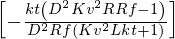

In [4]:
sys.A

the state equation,

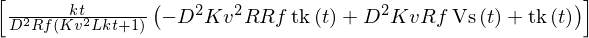

In [5]:
sys.StateEq

or the transfer function,

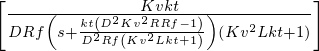

In [6]:
sys.TF

The results can also be viewed in other languages such as LaTeX,

In [7]:
print(sympy.latex(sys.A))

\left[\begin{matrix}- \frac{kt \left(D^{2} Kv^{2} R Rf - 1\right)}{D^{2} Rf \left(Kv^{2} L kt + 1\right)}\end{matrix}\right]


or Matlab,

In [8]:
print(sympy.octave_code(sys.A))

-kt.*(D.^2.*Kv.^2.*R.*Rf - 1)./(D.^2.*Rf.*(Kv.^2.*L.*kt + 1))


Other `sympy` functions can also be used to manipulate the equations if desired. However at this point we will substitute in values for the constants to allow us to simulate the system. This process starts by defining the values for each constant.

In [9]:
Values = {
    'R': 5,
    'L': 0.1,
    'Kv': 1000,
    'kt': 10,
    'D': 0.0015,
    'Rf': 4e6
}

Now the state equation matricies can be converted to `numpy` matricies.

In [10]:
A = to_numpy.matrix(sys.A, Values)
B = to_numpy.matrix(sys.B, Values)
C = to_numpy.matrix(sys.C, Values)
D = to_numpy.matrix(sys.D, Values)

A Forward Euler method can now be used to simulate the system given the initial condition `x0`.

In [11]:
dt = 0.0001
x0 = np.matrix([[0]])
tf = 0.15
Vs = np.matrix([[12]])

x = np.matrix(np.ndarray((A.shape[0], int(tf/dt) + 1)))
y = np.matrix(np.ndarray((C.shape[0], int(tf/dt) + 1)))

x[:,0] = x0
y[:,0] = C * x0 + D * Vs
for i in range(int(tf/dt)):
    x[:,i+1] = x[:,i] + dt * (A * x[:,i] + B * Vs)
    y[:,i+1] = C * x[:,i+1] + D * Vs

This data can now be plotted to view the system's time response.

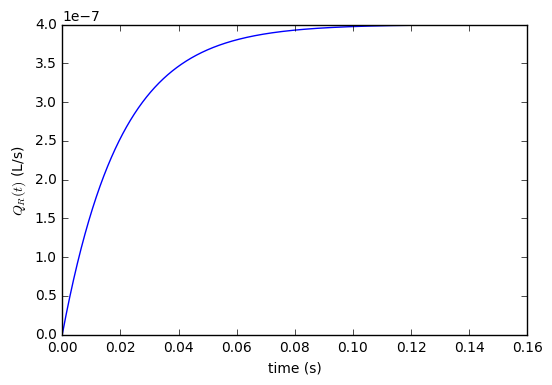

In [12]:
plt.plot(np.arange(0, tf, dt), y.T.A[:,0])
plt.ylabel('$Q_R(t)$ (L/s)')
plt.xlabel('time (s)')